### **Latar Belakang**


New York City (NYC) memiliki salah satu sistem transportasi yang paling kompleks dan padat di dunia, dengan jutaan perjalanan yang dilakukan setiap hari melalui berbagai mode transportasi, termasuk taksi. The NYC Taxi and Limousine Commission (NYC TLC) merupakan lembaga pemerintah Kota New York yang memberi lisensi dan mengatur industri taksi medali dan kendaraan sewaan, termasuk perusahaan berbasis aplikasi seperti Uber dan Lyft. Lanskap peraturan TLC mencakup taksi medali (kuning), taksi hijau atau Boro taxi, mobil hitam (termasuk layanan tradisional dan berbasis aplikasi), mobil livery berbasis komunitas, van komuter, kendaraan paratransit (ambulet), dan beberapa limosin mewah. (Wikipedia)

Data ini, yang dikumpulkan oleh NYC Taxi and Limousine Commission (TLC), memberikan gambaran mendalam tentang kegiatan perjalanan taksi di kota tersebut, mencakup aspek-aspek penting seperti lokasi penjemputan dan pengantaran, biaya, jarak, dan durasi perjalanan.

Dalam industri transportasi seperti layanan taksi, biaya tambahan sering dikenakan untuk mengatasi biaya operasional tertentu atau untuk merespons kondisi pasar, seperti jam sibuk atau malam hari. Dalam konteks data ini, biaya tambahan ini bisa sangat bervariasi dan memiliki dampak signifikan terhadap biaya total yang harus dibayar oleh penumpang. Memahami kapan dan bagaimana biaya tambahan ini dikenakan penting untuk semua stakeholder, termasuk perusahaan taksi, regulator, dan tentu saja pelanggan

**Masalah**

Pengenaan biaya tambahan lain-lain mungkin tidak selalu jelas atau konsisten, menyebabkan ketidakpuasan pelanggan dan potensial penurunan dalam penggunaan layanan taksi. Pelanggan mungkin merasa keberatan jika biaya tambahan terasa tidak adil atau tidak terduga. Untuk perusahaan taksi, penting untuk mengoptimalkan strategi penetapan harga ini agar tetap kompetitif sekaligus memastikan keberlanjutan operasional.

Pertanyaan Masalah:
1. Bagaimana korelasi antara biaya tambahan individu dan total biaya perjalanan?

2. Apakah ada tren waktu tertentu seperti waktu dalam hari atau hari dalam seminggu ketika biaya tambahan lebih sering atau lebih besar dikenakan?

3. Bagaimana perbandingan antara biaya tambahan yang dikenakan di berbagai wilayah penjemputan dan pengantaran?

4. Bagaimana pengaruh dari fitur-fitur lainnya terhadap biaya tambahan lainnya?

**Goals**

1. Menganalisis pengaruh masing-masing biaya tambahan terhadap total biaya yang dibayar penumpang. Hal ini akan membantu menilai seberapa signifikan setiap biaya tambahan dalam kontribusi terhadap total biaya.

2. Mengidentifikasi pola dalam penerapan biaya tambahan berdasarkan waktu penjemputan, yang bisa membantu dalam mengoptimalkan strategi penetapan harga dan mungkin mengurangi kejutan biaya untuk penumpang.

3. Mengidentifikasi apakah ada variasi geografis dalam penerapan biaya tambahan, yang mungkin mencerminkan perbedaan dalam kebijakan lokal atau biaya infrastruktur

4. Mengidentifikasi apakah fitur-fitur lain dapat memengaruhi biaya tambahan



# Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind, kruskal
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Dataset ini berisi informasi terkait lokasi penjemputan dan pengantaran, biaya, jarak, dan durasi perjalanan. Ada 20 kolom di dalam dataset NYC TLC Trip Record ini, yaitu:  

* VendorID = Kode yang menunjukkan penyedia LPEP yang menyediakan catatan.
     1. = Creative Mobile Technologies, LLC.
     2. = VeriFone Inc.
* lpep_pickup_datetime = Tanggal dan waktu ketika meter diaktifkan.
* lpep_dropoff_datetime = Tanggal dan waktu ketika meter dimatikan.
* Passenger_count = Jumlah penumpang dalam kendaraan. jumlah yang dimasukkan oleh pengemudi.
* Trip_distance = Jarak perjalanan yang dilalui dalam hitungan mil berdasarkan taksimeter.
* PULocationID = Zona Taksi TLC di mana taximeter diaktifkan.
* DOLocationID = Zona Taksi TLC di mana taximeter dimatikan.
* RateCodeID = Kode tarif akhir yang berlaku pada akhir perjalanan.
     1. = Tarif standar
     2. = JFK
     3. = Newark
     4. = Nassau atau Westchester
     5. = Tarif yang ditawar
     6. = Perjalanan kelompok

* Store_and_fwd_flag = Tanda ini menunjukkan apakah catatan perjalanan disimpan di
dalam memori kendaraan sebelum dikirim ke vendor,
yang disebut "simpan dan kirim", karena kendaraan tidak memiliki koneksi ke server.
   1. Y = perjalanan disimpan dan diteruskan
   2. N = bukan perjalanan simpan dan teruskan
* Payment_type = Kode numerik yang menunjukkan bagaimana penumpang membayar perjalanan.
     1. = Kartu kredit
     2. = Tunai
     3. = Tidak ada biaya
     4. = Perselisihan
     5. = Tidak diketahui
     6. = Perjalanan dibatalkan
* Fare_amount = Tarif waktu-dan-jarak dihitung oleh meter. Ekstra Tambahan dan biaya tambahan.
Saat ini, hanya termasuk biaya $0.50 dan $1 saat jam sibuk dan biaya semalam.
* MTA_tax = $0.50 pajak MTA yang secara otomatis dipicu berdasarkan tarif meter yang digunakan.
* Improvement_surcharge = Biaya tambahan $0.30 yang dikenakan pada perjalanan yang dipanggil pada saat flag-drop.
Biaya tambahan ini mulai dikenakan pada tahun 2015.
* Tip_amount = kolom ini secara otomatis diisi untuk tips kartu kredit. Tips tunai tidak termasuk.
* Tolls_amount = Total jumlah semua tol yang dibayar dalam perjalanan.
* Total_amount = Total yang dibebankan kepada penumpang. Tidak termasuk tips tunai.
* Trip_type = Kode yang menunjukkan apakah perjalanan adalah panggilan di jalan atau pemesanan yang secara otomatis ditetapkan berdasarkan tarif meter yang digunakan tetapi dapat diubah oleh pengemudi.
     1. = Panggilan langsung di jalan
     2. = pemesanan

* Congestion_surcharge = biaya tambahan yang dikenakan kepada pengemudi taksi dan layanan transportasi livery di New York City (NYC) ketika mereka melewati daerah dengan lalu lintas yang padat atau terhambat.
Biaya tambahan kemacetan adalah:
   1. $2,50 untuk perjalanan dengan taksi
   2. $2,75 untuk perjalanan dengan Kendaraan Sewa, termasuk limosin, dan Street-Hail Liveries (Taksi Ramah Lingkungan)




Berikut 5 baris teratas dan terbawah dari dataset NYC TLC Trip Record.

In [2]:
df = pd.read_csv('NYC TLC Trip Record.csv')
display(df.head(),df.tail())

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,NaN,NaN,49,62,NaN,4070.82,15.70,0.0,0.0,0.00,0.0,NaN,1.0,16.70,NaN,NaN,NaN
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,NaN,1.0,5.41,NaN,NaN,NaN
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,NaN,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,NaN,1.0,21.04,NaN,NaN,NaN
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,NaN,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,NaN,1.0,19.18,NaN,NaN,NaN
68210,2,2023-01-31 23:51:00,2023-02-01 00:07:00,NaN,NaN,256,140,NaN,5.82,23.65,0.0,0.0,2.00,0.0,NaN,1.0,29.40,NaN,NaN,NaN


## Data Understanding and Cleaning
Untuk melakukan analisis, diperlukan untuk mengenal dataset terlebih dahulu dalam tahapan *data understanding*. Dari proses ini, dapat diketahui anomali-anomali apa saja yang terdapat di dalam dataset ini dan perlu ditangani dalam tahapan *data cleaning*. Setiap penangan anomali yang dilakukan, akan disertai dengan justifikasi langkah yang diambil, baik secara *domain knowledge* maupun secara statistik.


Sebelum melanjutkan dengan analisis lebih lanjut, langkah awal adalah memahami dataset yang digunakan dalam tahap "pemahaman data". Ini penting untuk mengidentifikasi anomali yang ada dalam dataset dan menyiapkan langkah-langkah untuk membersihkan data di tahap berikutnya.

Dalam konteks dataset perjalanan TLC New York, hal-hal yang perlu diperhatikan mungkin meliputi atribut seperti lokasi awal dan tujuan perjalanan, waktu perjalanan, biaya perjalanan, atau jenis kendaraan yang digunakan. Memahami informasi ini memungkinkan kita untuk mengidentifikasi anomali, seperti nilai biaya yang tidak masuk akal, waktu perjalanan yang tidak mungkin, atau data yang hilang.

Tindakan yang diambil untuk menangani anomali tersebut akan didasarkan pada _domain knowledge_ dan analisis statistik. Misalnya, jika ada biaya perjalanan yang sangat tinggi atau negatif, langkah yang tepat bisa melibatkan penelusuran lebih lanjut untuk memahami penyebabnya. Ini bisa saja berasal dari kesalahan dalam proses pencatatan atau mungkin mewakili perjalanan khusus yang memang memiliki biaya tinggi.

Dalam analisis statistik, kita dapat menggunakan teknik seperti visualisasi untuk mendeteksi pola atau distribusi yang tidak biasa dalam data. Jika terdapat pola yang aneh atau data yang mencurigakan, langkah-langkah lebih lanjut dapat diambil, seperti menghapus entri yang tidak valid atau melakukan normalisasi pada data.

Penting untuk mendokumentasikan setiap langkah yang diambil dalam tahap pembersihan data dan memberikan justifikasi yang jelas untuk tindakan tersebut. Hal ini akan membantu memastikan keabsahan hasil analisis yang dilakukan pada tahap selanjutnya.

In [3]:
display(df.describe(), df.describe(include='object'))

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,68211.000000,63887.000000,68211.000000,68211.000000,63887.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,0.0,68211.000000,68211.000000,63887.000000,63877.000000,63887.000000
mean,1.863028,1.117160,98.549735,138.429901,1.315870,8.114852,16.603545,0.825431,0.588340,2.139012,0.169627,NaN,0.951625,21.789377,1.373613,1.021933,0.726748
std,0.343820,1.372913,61.244314,76.761311,0.979054,585.105955,13.470121,1.269904,0.385819,3.052710,1.099789,NaN,0.196875,15.457115,0.508039,0.146465,1.212836
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-70.000000,-2.500000,-0.500000,-10.500000,0.000000,NaN,-1.000000,-71.500000,1.000000,1.000000,-2.750000
25%,2.000000,1.000000,74.000000,74.000000,1.000000,1.110000,9.300000,0.000000,0.500000,0.000000,0.000000,NaN,1.000000,12.900000,1.000000,1.000000,0.000000
50%,2.000000,1.000000,75.000000,138.000000,1.000000,1.850000,13.500000,0.000000,0.500000,1.600000,0.000000,NaN,1.000000,17.900000,1.000000,1.000000,0.000000
75%,2.000000,1.000000,129.000000,219.000000,1.000000,3.210000,19.800000,1.000000,0.500000,3.330000,0.000000,NaN,1.000000,26.150000,2.000000,1.000000,2.750000
max,2.000000,99.000000,265.000000,265.000000,9.000000,120098.840000,490.000000,12.500000,2.750000,222.220000,36.050000,NaN,1.000000,491.000000,5.000000,2.000000,2.750000


,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag
count,68211,68211,63887
unique,66575,66519,2
top,2023-01-09 09:08:00,2023-01-09 00:00:00,N
freq,4,6,63579


* Dilihat dari jumlah masing-masing data, yang tidak memiliki data secara utuh adalah `store_and_fwd_flag`,`ratecodeid`, `passenger_count`, `payment type`, `trip_type`, `congestion_charge`.
* `ehail_fee` tidak memiliki data sama sekali


In [4]:
pd.DataFrame({
    'column': df.columns.values,
    'df_type': df.dtypes.values,
    'null(%)': df.isna().mean().values * 100,
    'negative': [True if df[col].dtype == float and (df[col]< 0).any() else False for col in df.columns],
    '0_value(%)': [len(df[col][df[col] == 0]) / len(df) * 100 if col in df.select_dtypes(include=[np.number]).columns else 0 for col in df.columns],
    'n_unique': df.nunique().values,
    'sample_unique': [df[col].unique() for col in df.columns]
})

,column,df_type,null(%),negative,0_value(%),n_unique,sample_unique
0,VendorID,int64,0.000000,False,0.000000,2,"[2, 1]"
1,lpep_pickup_datetime,object,0.000000,False,0.000000,66575,"[2023-01-01 00:26:10, 2023-01-01 00:51:03, 202..."
2,lpep_dropoff_datetime,object,0.000000,False,0.000000,66519,"[2023-01-01 00:37:11, 2023-01-01 00:57:49, 202..."
3,store_and_fwd_flag,object,6.339154,False,0.000000,2,"[N, Y, nan]"
4,RatecodeID,float64,6.339154,False,0.000000,6,"[1.0, 5.0, 4.0, 3.0, 2.0, 99.0, nan]"
5,PULocationID,int64,0.000000,False,0.000000,226,"[166, 24, 223, 41, 181, 255, 75, 66, 195, 83, ..."
6,DOLocationID,int64,0.000000,False,0.000000,249,"[143, 43, 179, 238, 74, 262, 45, 75, 166, 140,..."
7,passenger_count,float64,6.339154,False,0.492589,10,"[1.0, 2.0, 4.0, 3.0, 6.0, 5.0, 0.0, 7.0, 9.0, ..."
8,trip_distance,float64,0.000000,False,4.911231,1870,"[2.58, 1.81, 0.0, 1.3, 1.1, 2.78, 3.8, 1.88, 1..."
9,fare_amount,float64,0.000000,True,0.121681,2553,"[14.9, 10.7, 7.2, 6.5, 6.0, 17.7, 19.1, 14.2, ..."


Secara umum, kita bisa melihat bahwa:
* Dataset NYC TLC Trip Record memiliki 20 kolom dan 68.211 baris

* Dari 20 kolom terdapat 16 kolom tipe data float, 3 kolom tipe integer dan 3 kolom tipe data object.
* beberapa kolom yakni `store_and_fwd_flag`,`ratecodeid`, `passenger_count`, `payment type`, `trip_type`, `congestion_charge` dan `ehail_fee` memiliki data kosong. Data kosong pada kolom-kolom tersebut diwakili dengan data NaN.
* Satu-satunya kolom yang seluruh datanya NaN adalah `ehail_fee`, karena kolom tersebut tidak dapat diisi datanya maka kolom tersebut akan dihapus.
* kolom `lpep_pickup_datetime`, `lpep_dropoff_datetime` memiliki data tipe object. Dari penjelasannya, kolom ini seharusnya memiliki tipe data datetime. maka akan dirubah tipe datanya.
* kolom `passenger_count`, `trip_distance`, `fare_amount`, `extra`, `mta_tax`, 
    `tip_amount`, `tolls_amount`, `improvement_surcharge`, `total_amount`, `congestion_surcharge` memiliki nilai 0, tetapi tidak semua kolom tersebut tidak dibolehkan bernilai 0. maka yang akan ditangani hanyalah kolom `passenger_count` dan `trip_distance`.
* beberapa kolom seperti `fare_amount`, `extra`, `mta_tax`, `tip_amount`, `improvement_surcharge`, `total_amount`, dan `congestion_surcharge` memiliki data yang lebih kecil dari angka 0 atau memiliki nilai yang negatif. hal tersebut akan ditangani lebih lanjut

### `Handling Column`

Kolom `VendorID` hanya memiliki data mengenai penyedia LPEP sehingga tidak akan relevan dalam analisis data ini, maka akan dilakukan drop

In [5]:
df.drop(columns=['VendorID'], inplace=True)

Kolom `store_and_fwd_flag` memiliki value yang sama yaitu N mendekati 100% dalam kolomnya, maka akan sulit dilakukan analisis dan juga datanya tidak relevan dalam analisis maka akan dilakukan drop terhadap kolom tersebut

In [6]:
df.drop(columns=['store_and_fwd_flag'], inplace=True)

kolom `lpep_pickup_datetime`, `lpep_dropoff_datetime` akan diubah tipe datanya menjadi datetime

In [7]:
df['lpep_pickup_datetime'] = pd.to_datetime(df['lpep_pickup_datetime'])
df['lpep_dropoff_datetime'] = pd.to_datetime(df['lpep_dropoff_datetime'])

### ` Missing Value`

Disini missing value akan dicek dalam grafik menggunakan library `missingno`

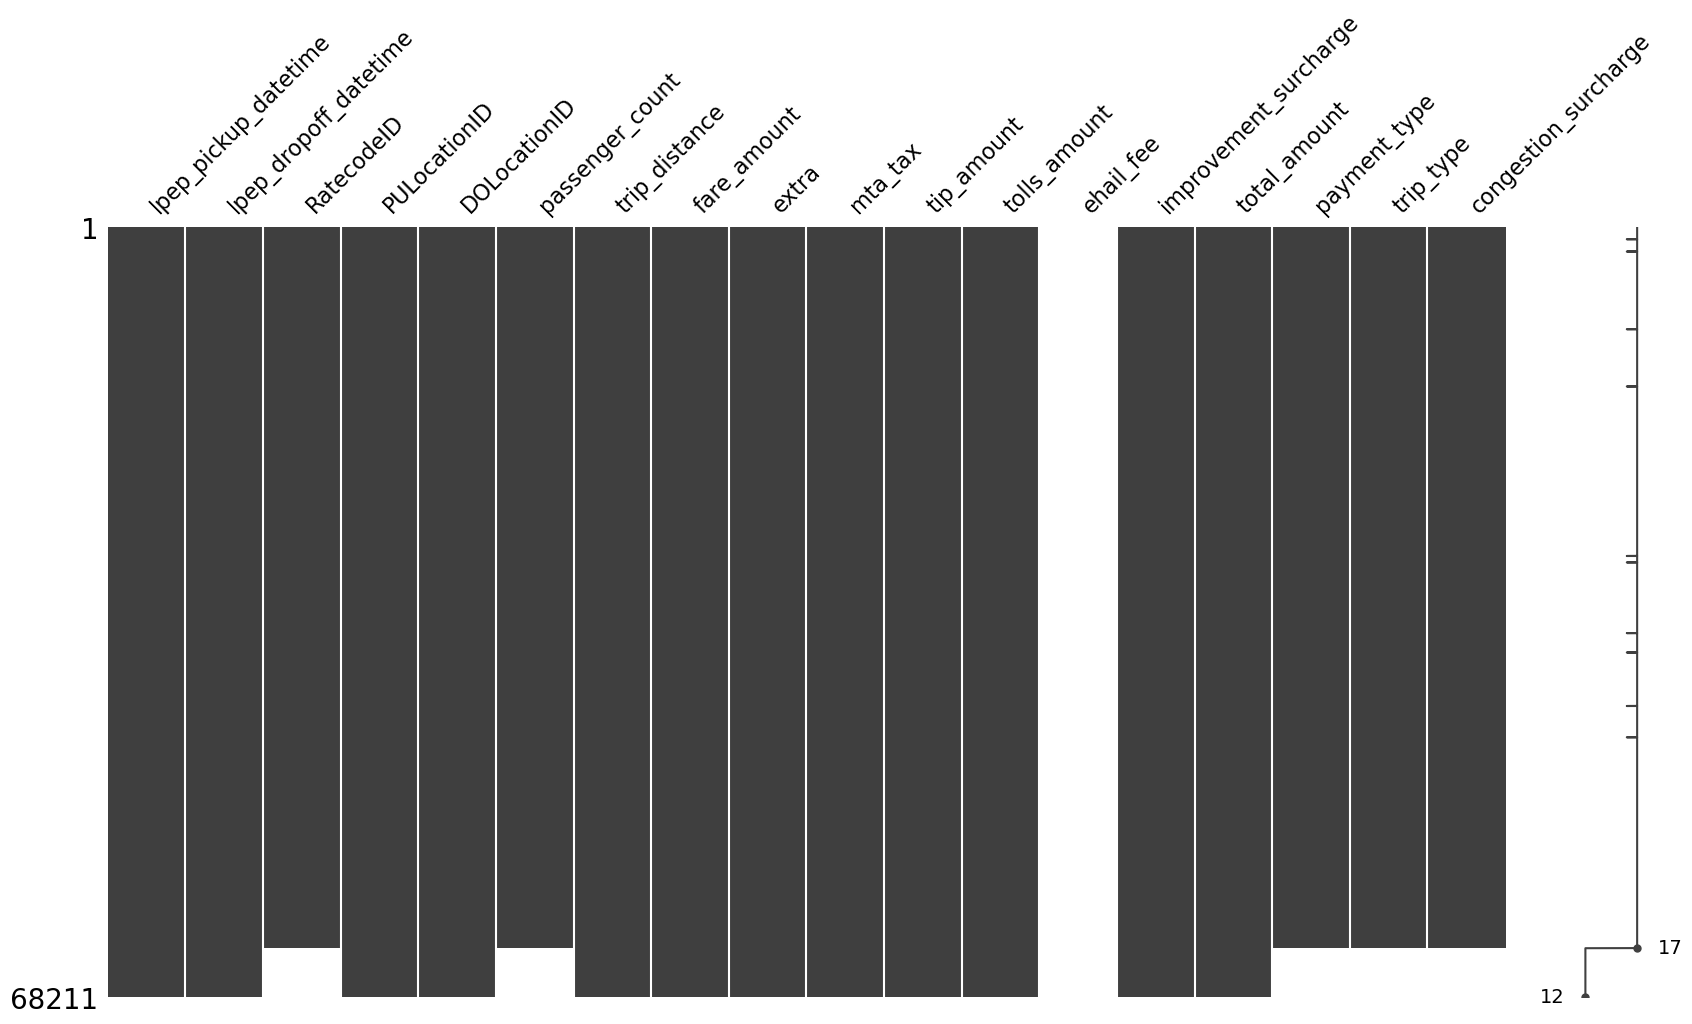

In [8]:
import missingno as msno

msno.matrix(df, figsize=(20, 10))
plt.show()


Dapat dilihat dari grafik di atas bahwa  kolom ehail fee tidak memiliki data sama sekali, dan missing value lainnya dapat diasumsikan banyak terdapat pada baris yang sama. Maka dari itu kolom `ehail_fee` akan ditangani terlebih dahulu dengan didrop karena tidak ada yang bisa didapat dari kolom tersebut.

In [9]:
df = df.drop(columns='ehail_fee')

Setelah kolom `ehail_fee` sudah didrop, selanjutnya missing value yang terdapat pada kolom lainnya di cek terlebih dahulu apakah ada korelasi antar kolom yang memiliki missing value

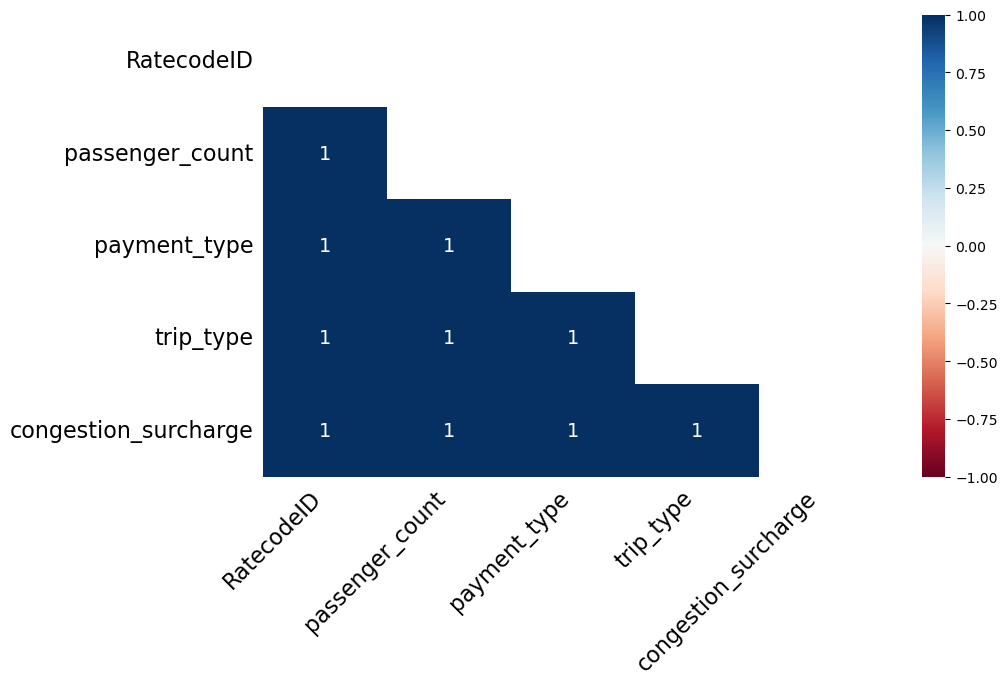

In [10]:
msno.heatmap(df, figsize=(10, 6))
plt.show()

Berdasarkan grafik di atas, hubungan antar missing value memiliki nilai 1, yang dapat diartikan bahwa ketika terdapat kolom missing value pada suatu baris, maka kolom-kolom yang lainnya juga terdapat missing value.

Untuk mempermudah melihat korelasi antar missing value dalam analisa ini, maka data tambahan diperlukan guna untuk membantu mencari korelasi missing valuenya sehingga dapat ditentukan cara menanganinya. maka dari itu dataset 'taxi_zone_lookup.csv' yang didapatkan dari halaman website resminya https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page  ditambahkan dalam penelitian ini

In [11]:
df_zone = pd.read_csv('taxi_zone_lookup.csv')
df_zone.head()

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone


Karena kolom `LocationID` dalam dataset 'taxi_zone_lookup.csv' dan kolom `PULocationID` juga `DOLocationID` dalam dataset 'NYC TLC Trip Record.csv' berdasarkan data yang sama, maka dilakukan penggabungan berdasarkan kolom-kolom tersebut pada dataset ini, yang memungkinkan untuk menganalisis data berdasarkan zona geografis yang lebih spesifik

In [12]:
df = df.merge(df_zone, left_on='PULocationID', right_on='LocationID', how='left')
df.rename(columns={'Borough': 'Pickup_Borough', 'Zone': 'Pickup_Zone', 'service_zone': 'Pickup_service_zone'}, inplace=True)
df.drop(columns='LocationID', inplace=True)

df = df.merge(df_zone, left_on='DOLocationID', right_on='LocationID', how='left')
df.rename(columns={'Borough': 'Dropoff_Borough', 'Zone': 'Dropoff_Zone', 'service_zone': 'Dropoff_service_zone'}, inplace=True)
df.drop(columns='LocationID', inplace=True)


df.head()

,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,...,total_amount,payment_type,trip_type,congestion_surcharge,Pickup_Borough,Pickup_Zone,Pickup_service_zone,Dropoff_Borough,Dropoff_Zone,Dropoff_service_zone
0,2023-01-01 00:26:10,2023-01-01 00:37:11,1.0,166,143,1.0,2.58,14.9,1.0,0.5,...,24.18,1.0,1.0,2.75,Manhattan,Morningside Heights,Boro Zone,Manhattan,Lincoln Square West,Yellow Zone
1,2023-01-01 00:51:03,2023-01-01 00:57:49,1.0,24,43,1.0,1.81,10.7,1.0,0.5,...,15.84,1.0,1.0,0.00,Manhattan,Bloomingdale,Yellow Zone,Manhattan,Central Park,Yellow Zone
2,2023-01-01 00:35:12,2023-01-01 00:41:32,1.0,223,179,1.0,0.00,7.2,1.0,0.5,...,11.64,1.0,1.0,0.00,Queens,Steinway,Boro Zone,Queens,Old Astoria,Boro Zone
3,2023-01-01 00:13:14,2023-01-01 00:19:03,1.0,41,238,1.0,1.30,6.5,0.5,1.5,...,10.20,1.0,1.0,0.00,Manhattan,Central Harlem,Boro Zone,Manhattan,Upper West Side North,Yellow Zone
4,2023-01-01 00:33:04,2023-01-01 00:39:02,1.0,41,74,1.0,1.10,6.0,0.5,1.5,...,8.00,1.0,1.0,0.00,Manhattan,Central Harlem,Boro Zone,Manhattan,East Harlem North,Boro Zone


Setelah ditambahkan dataset baru, terdapat 6 kolom baru yaitu: 
1. Pickup_Borough = Daerah administratif di New York City tempat penumpang naik taksi atau limusin.
2. Pickup_Zone = zona tertentu di dalam sebuah borough di New York City tempat penumpang naik taksi atau limusin. Zona-zona ini sering kali dibagi untuk memudahkan penentuan tarif atau untuk tujuan manajemen layanan
3. Pickup_service_zone = zona layanan spesifik yang dapat mencakup beberapa zona atau borough di New York City tempat penumpang naik taksi atau limusin. Biasanya, ini terkait dengan regulasi dan kebijakan tarif untuk perjalanan
4. Dropoff_Borough = borough di New York City tempat penumpang turun dari taksi atau limusin setelah perjalanan selesai
5. Dropoff_Zone = zona di dalam sebuah borough di New York City tempat penumpang turun dari taksi atau limusin setelah perjalanan selesai
6. Dropoff_service_zone = zona layanan spesifik di New York City tempat penumpang turun dari taksi atau limusin setelah perjalanan selesai

**RatecodeID** 

Karena kolom ini adalah kolom kategorikal yang merepresentasikan kode tarif, mengisi nilai yang hilang dengan modus dapat menjadi pilihan yang baik.

In [13]:
df['RatecodeID'].value_counts()

RatecodeID
1.0     62103
5.0      1529
2.0       158
4.0        57
3.0        30
99.0       10
Name: count, dtype: int64

Karena `RatecodeID` yang memiliki modus tertinggi adalah value '1', maka data NaN akan diisi oleh 1

In [14]:
mode_ratecodeid = df['RatecodeID'].mode()[0]
df['RatecodeID'].fillna(mode_ratecodeid, inplace=True)
print(df['RatecodeID'].value_counts())
print('Total NaN values: ', len(df[df['RatecodeID'].isna()]))

RatecodeID
1.0     66427
5.0      1529
2.0       158
4.0        57
3.0        30
99.0       10
Name: count, dtype: int64
Total NaN values:  0


Data NaN dalam `RatecodeID` sudah diisi oleh modus dari kolom tersebut yaitu 1, sehingga tidak ada missing Value dalam kolom tersebut 

**passenger_count**

Selanjutnya `passenger_count` yang akan dilakukan handling missing value. karnea kolom ini adalah kolom numerik, tetapi karena jumlah penumpang biasanya terbatas dalam jangkauan tertentu, menggunakan median bisa lebih tepat karena tahan terhadap nilai ekstrem.

In [15]:
df['passenger_count'].value_counts()

passenger_count
1.0    54299
2.0     5096
5.0     1772
6.0     1054
3.0      958
4.0      364
0.0      336
7.0        4
9.0        2
8.0        2
Name: count, dtype: int64

In [16]:
median_passenger_count = df['passenger_count'].median()
df['passenger_count'].fillna(median_passenger_count, inplace=True)
print(df['passenger_count'].value_counts())
print('Total NaN values: ', len(df[df['passenger_count'].isna()]))

passenger_count
1.0    58623
2.0     5096
5.0     1772
6.0     1054
3.0      958
4.0      364
0.0      336
7.0        4
9.0        2
8.0        2
Name: count, dtype: int64
Total NaN values:  0


Data NaN dalam `passenger_count` sudah diisi oleh median dari kolom tersebut yaitu jumlah penumpang nya hanya 1, sehingga tidak ada missing Value dalam kolom tersebut.

**payment_type**

Pada kolom inijuga termasuk pada kolom kategorikal, sehingga untuk mengisi data nya yang missing baiknya menggunakan modus dari value kolomnya.

In [17]:
print(df['payment_type'].value_counts())
print('Total NaN values: ', len(df[df['payment_type'].isna()]))

payment_type
1.0    40686
2.0    22632
3.0      472
4.0       95
5.0        2
Name: count, dtype: int64
Total NaN values:  4324


payment_type 1 adalah tipe pembayaran terbanyak dalam dataset trip taksi ini, value 1 adalah tipe pembayaran kredit, karena diketahui dari latar belakang dataset ini bahwa tip akan diberikan secara otomatis apabila menggunakan pembayaran menggunakan kartu kredit, maka apabila data perjalanannya memberikan tip tetapi payment_type nya memiliki missing value maka akan diisi oleh value 1 atau pembayarannya menggunakan kredit.

In [18]:
missing_payment_by_tips = (df['tip_amount'] > 0) & (df['payment_type'].isna())
print(f'jumlah NaN berdasarkan tips_amount : {missing_payment_by_tips.sum()}')


jumlah NaN berdasarkan tips_amount : 3831


Diketahui bahwa ada 3831 data yang hilang pada payment type apabila dilihat berdasarkan perjalanan yang memberikan tip, sehingga 3831 data yang hilang tersebut akan diisi oleh pembayaran kartu kredit atau value 1  

In [19]:
df.loc[missing_payment_by_tips, 'payment_type'] = 1
print(df['payment_type'].value_counts(dropna=False))

payment_type
1.0    44517
2.0    22632
NaN      493
3.0      472
4.0       95
5.0        2
Name: count, dtype: int64


Missing value sebanyak 3,831 nilai yang hilang di kolom payment_type telah diisi dengan value 1 untuk setiap baris yang dimana memiliki tip_amount lebih dari 0. Sekarang, hanya tersisa 493 nilai yang masih hilang di kolom payment_type.

Untuk mengisi missing value sisanya dimana tidak ada tip yang diberikan, peneliti memeriksa total_amount dibandingkan dengan median total transaksi. Jika total_amount lebih tinggi dari median, ini menunjukkan kemungkinan penggunaan kartu kredit atau value 1, sehingga peneliti mengisi nilai tersebut sebagai tipe pembayaran kartu kredit. Sebaliknya, jika total_amount lebih rendah atau sama dengan median, yang cenderung mengindikasikan pembayaran  yang lebih kecil atau standar, peneliti mengisi payment_type sebagai tunai

In [20]:
median_total = df['total_amount'].median() 
df.loc[(df['tip_amount'] <= 0) & (df['total_amount'] > median_total) & (df['payment_type'].isna()), 'payment_type'] = 1
df.loc[(df['tip_amount'] <= 0) & (df['total_amount'] <= median_total) & (df['payment_type'].isna()), 'payment_type'] = 2

print(df['payment_type'].value_counts())
print(f"Total data NaN: {df['payment_type'].isna().sum()}")

payment_type
1.0    44842
2.0    22800
3.0      472
4.0       95
5.0        2
Name: count, dtype: int64
Total data NaN: 0


Missing Value dalam payment_type sudah ditangani sehingga tidak ada lagi data yang hilang

**Trip_type**

Selanjutnya untuk mengatasi trip_type yang memiliki missing value, pertama kita coba lihat dulu apakah ada pengaruh dari value RatecodeID 

In [21]:
df['trip_type'].isna().sum()

4334

In [22]:
df[df['trip_type'].isna()].groupby('RatecodeID').agg(total=('RatecodeID', 'count'))

,total
RatecodeID,
1.0,4324
99.0,10


In [23]:
print(f"persentase value RatecodeID = 99 adalah: {len(df[df['RatecodeID']==99.0])/len(df)*100:.2f}%")

persentase value RatecodeID = 99 adalah: 0.01%


Setelah missing value pada trip_type dilihat berdasarkan RatecodeID nya , terdapat 4324 missing value berdasarkan RatecodeID '1' dan juga terdapat 10 missing value  berdasarkan RatecodeID '99'.
Berdasarkan hal tersebut, RatecodeID dengan value '99' akan di drop guna menghilangkan missing value pada trip_type, dan juga didrop karena memiliki data dalam valuenya dibawah 1%

In [24]:
df = df.drop(df[df['RatecodeID']== 99.0].index)

RatecodeID dengan value 99 yang memiliki trip_type missing value telah dihapus dari dataset

In [25]:
df.groupby(['RatecodeID', 'trip_type']).agg(total=('trip_type', 'count'))

total
RatecodeID trip_type       
1.0        1.0        62097
           2.0            6
2.0        1.0          158
3.0        1.0           30
4.0        1.0           55
           2.0            2
5.0        1.0          136
           2.0         1393

In [26]:
df[df['trip_type'].isna()].groupby('RatecodeID').agg(total=('RatecodeID', 'count'))


,total
RatecodeID,
1.0,4324


Berdasarkan data diatas diketahui bahwa RatecodeID 1 memiliki trip_type dengan value 1. Karena data yang memiliki missing value pada kolom trip_type memiliki RatecodeID 1, maka missing valuenya akan diisi dengan nilai 1 yang juga sebuah modus dalam kolomnya

In [27]:
df['trip_type'].fillna(1, inplace=True)
print(df['trip_type'].value_counts())
print('Total NaN values: ', len(df[df['passenger_count'].isna()]))

trip_type
1.0    66800
2.0     1401
Name: count, dtype: int64
Total NaN values:  0


**congestion_surcharge**

In [28]:
df['congestion_surcharge'].value_counts(dropna=False)

congestion_surcharge
 0.00    46986
 2.75    16872
 NaN      4324
 2.50       16
-2.75        3
Name: count, dtype: int64

'congestion_surchage' adalah kolom biaya tambahan kemacetan untuk perjalanan yang dimulai, diakhiri, atau melewati Zona Kemacetan. Zona Kemacetan adalah Manhattan, di South 96th Street yang berdasarkan halaman website nya TLC mengenai [Congestion Surcharge](https://www.nyc.gov/site/tlc/about/congestion-surcharge.page#:~:text=The%20congestion%20surcharge%20is%3A,%2DHail%20Liveries%20(Green%20Taxis))


![Zona Congestion](https://www.nyc.gov/assets/tlc/images/content/pages/about/congestion-pricing.png)

In [29]:
df['Dropoff_Borough'].unique()

array(['Manhattan', 'Queens', 'Brooklyn', nan, 'Bronx', 'Unknown',
       'Staten Island', 'EWR'], dtype=object)

Karena 'congestion_surcharge' memiliki data yang didasari dari lokasi di Manhattan, maka kolom Dropoff_borough digunakan untuk mengatasi missing value dalam kolom ini

* Jika pada baris yang memiliki missing value pada 'congestion_surcharge' 'Dropoff_Borough' nya adalah Manhattan dan 'congestion_surcharge' akan diisi dengan 2.75
* Untuk perjalanan yang 'Dropoff_Borough' nya selain Manhattan, dan 'congestion_surcharge' memiliki missing value, akan diisi dengan 0.00, karena diasumsikan tidak ada biaya kemacetan yang diberikan

In [30]:
df.loc[(df['Dropoff_Borough'] == 'Manhattan') & (df['congestion_surcharge'].isna()), 'congestion_surcharge'] = 2.75
df.loc[(df['Dropoff_Borough'] != 'Manhattan') & (df['congestion_surcharge'].isna()), 'congestion_surcharge'] = 0.00

In [31]:
print(df['congestion_surcharge'].value_counts(dropna=False))

congestion_surcharge
 0.00    49067
 2.75    19115
 2.50       16
-2.75        3
Name: count, dtype: int64


Missing Value dalam kolom 'congestion_surcharge' sudah diatasi berdasarkan 'Dropoff_Borough' 

**Pickup_Borough**

In [32]:
print(df['Pickup_Borough'].value_counts())
print(f"Total NaN : {df['Pickup_Borough'].isna().sum()}")

Pickup_Borough
Manhattan        39434
Queens           17990
Brooklyn          9330
Bronx             1234
Unknown            135
Staten Island       12
EWR                  1
Name: count, dtype: int64
Total NaN : 65


Selanjutnya menangani missing value dalam kolom 'Pickup_Borough', terdapat 65 missing value dalam data kolom ini. Dilihat terlebih dahulu baris-baris yang memiliki kolom 'Pickup_Borough' yang hilang valuenya dalam dataframe agar mendapat insight untuk diatasi berdasarkan kolom lain  

In [33]:
df[df['Pickup_Borough'].isna()]

,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,...,total_amount,payment_type,trip_type,congestion_surcharge,Pickup_Borough,Pickup_Zone,Pickup_service_zone,Dropoff_Borough,Dropoff_Zone,Dropoff_service_zone
1009,2023-01-01 18:33:47,2023-01-01 19:12:24,1.0,265,14,1.0,0.00,57.2,0.0,1.5,...,58.70,1.0,1.0,0.00,NaN,Outside of NYC,NaN,Brooklyn,Bay Ridge,Boro Zone
2286,2023-01-02 17:21:24,2023-01-02 17:24:47,1.0,265,265,1.0,0.50,5.1,0.0,1.5,...,6.60,2.0,1.0,0.00,NaN,Outside of NYC,NaN,NaN,Outside of NYC,NaN
2551,2023-01-02 19:41:31,2023-01-02 20:16:51,1.0,265,22,1.0,0.00,50.2,0.0,1.5,...,51.70,1.0,1.0,0.00,NaN,Outside of NYC,NaN,Brooklyn,Bensonhurst West,Boro Zone
3676,2023-01-03 13:37:26,2023-01-03 13:50:48,1.0,265,265,3.0,0.00,12.1,0.0,0.5,...,25.35,2.0,1.0,0.00,NaN,Outside of NYC,NaN,NaN,Outside of NYC,NaN
3677,2023-01-03 13:54:21,2023-01-03 14:08:09,1.0,265,237,1.0,0.00,12.1,0.0,0.5,...,16.35,2.0,1.0,2.75,NaN,Outside of NYC,NaN,Manhattan,Upper East Side South,Yellow Zone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56436,2023-01-28 08:43:12,2023-01-28 09:41:59,1.0,265,92,1.0,14.72,76.5,0.0,0.5,...,78.00,2.0,1.0,0.00,NaN,Outside of NYC,NaN,Queens,Flushing,Boro Zone
58293,2023-01-29 07:55:12,2023-01-29 09:03:03,1.0,265,92,1.0,15.69,87.0,0.0,0.5,...,88.50,2.0,1.0,0.00,NaN,Outside of NYC,NaN,Queens,Flushing,Boro Zone
58858,2023-01-29 14:28:00,2023-01-29 15:14:13,1.0,265,14,1.0,0.00,57.2,0.0,1.5,...,58.70,1.0,1.0,0.00,NaN,Outside of NYC,NaN,Brooklyn,Bay Ridge,Boro Zone
59001,2023-01-29 16:04:12,2023-01-29 16:18:04,5.0,265,265,1.0,5.20,50.0,0.0,0.0,...,52.00,1.0,2.0,0.00,NaN,Outside of NYC,NaN,NaN,Outside of NYC,NaN


Terlihat pada dataframe tersebut pada baris yang kolom 'Pickup_Borough' tidak ada datanya, memiliki data kolom 'Pickup_Zone' nya Outside of NYC atau diluar Kota New York. Maka dicoba dibuktikan lebih lanjut 

In [34]:
df[df['Pickup_Borough'].isna()].groupby('Pickup_Zone').agg(total=('Pickup_Zone', 'count'))

,total
Pickup_Zone,
Outside of NYC,65


Ternyata semua missing value dalam 'Pickup_Borough' memeiliki 'Pickup_Zone' yang sama yaitu diluar Kota New York. Karena analisis ini berfokus pada Kota New York, maka value 'Outside of NYC' akan dihapuskan dari kolom 'Pickup_Zone' yang juga akan menghapus missing value pada kolom 'Pickup_Borough'

In [35]:
df = df.drop(df[df['Pickup_Zone'] == 'Outside of NYC'].index)

In [36]:
print(df['Pickup_Borough'].value_counts())
print(f"Total NaN : {df['Pickup_Borough'].isna().sum()}")

Pickup_Borough
Manhattan        39434
Queens           17990
Brooklyn          9330
Bronx             1234
Unknown            135
Staten Island       12
EWR                  1
Name: count, dtype: int64
Total NaN : 0


**Pickup_Zone**

In [37]:
print(f"Total NaN : {df['Pickup_Zone'].isna().sum()}")

Total NaN : 135


Dilanjutkan menangani missing value dalam kolom 'Pickup_Zone', terdapat 135 missing value dalam data kolom ini. Dilihat terlebih dahulu baris-baris yang memiliki kolom 'Pickup_Zone' yang hilang valuenya dalam dataframe agar mendapat insight untuk diatasi berdasarkan kolom lain  

In [38]:
df[df['Pickup_Zone'].isna()]

,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,...,total_amount,payment_type,trip_type,congestion_surcharge,Pickup_Borough,Pickup_Zone,Pickup_service_zone,Dropoff_Borough,Dropoff_Zone,Dropoff_service_zone
115,2023-01-01 01:52:58,2023-01-01 01:53:00,1.0,264,264,1.0,0.00,3.0,1.0,0.5,...,26.3,1.0,1.0,0.0,Unknown,NaN,NaN,Unknown,NaN,NaN
245,2023-01-01 03:16:39,2023-01-01 03:16:42,5.0,264,264,1.0,0.00,10.0,0.0,0.0,...,11.0,2.0,2.0,0.0,Unknown,NaN,NaN,Unknown,NaN,NaN
283,2023-01-01 05:29:35,2023-01-01 05:29:37,5.0,264,264,1.0,0.00,12.0,0.0,0.0,...,15.6,1.0,2.0,0.0,Unknown,NaN,NaN,Unknown,NaN,NaN
1331,2023-01-02 04:41:06,2023-01-02 04:41:08,1.0,264,264,1.0,0.00,3.0,1.0,0.5,...,5.5,2.0,1.0,0.0,Unknown,NaN,NaN,Unknown,NaN,NaN
1345,2023-01-02 06:40:44,2023-01-02 06:50:28,1.0,264,256,2.0,2.40,10.0,0.0,1.5,...,11.5,2.0,1.0,0.0,Unknown,NaN,NaN,Brooklyn,Williamsburg (South Side),Boro Zone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61912,2023-01-31 08:16:40,2023-01-31 08:45:26,1.0,264,264,1.0,0.00,19.5,0.0,1.5,...,21.0,1.0,1.0,0.0,Unknown,NaN,NaN,Unknown,NaN,NaN
62261,2023-01-31 11:00:15,2023-01-31 11:00:17,5.0,264,264,1.0,0.18,10.0,0.0,0.0,...,11.0,1.0,2.0,0.0,Unknown,NaN,NaN,Unknown,NaN,NaN
63725,2023-01-31 21:24:02,2023-01-31 21:24:03,5.0,264,264,1.0,0.00,35.0,0.0,0.0,...,36.0,1.0,2.0,0.0,Unknown,NaN,NaN,Unknown,NaN,NaN
63868,2023-01-31 23:44:44,2023-01-31 23:45:15,5.0,264,264,1.0,0.00,-10.0,0.0,0.0,...,-11.0,4.0,2.0,0.0,Unknown,NaN,NaN,Unknown,NaN,NaN


Berdasarkan dataframe tersebut dapat dilihat bahwa missing value pada kolom 'Pickup_Zone' memiliki 'Pickup_Borough' yang valuenya Unknown, atau tidak diketahui. Diasumsikan bahwa perjalanan taksi tersebut tidak dilakukan dalam Kota New York. Untuk membuktikannya dilihat terlebih dahulu apakah semua yang missing value berasal dari  'Pickup_Borough' yang valuenya 'Unknown'. Apabila memang benar maka baris dengan value unknown di kolom 'Pickup_Borough' akan didrop

In [39]:
df[df['Pickup_Zone'].isna()].groupby('Pickup_Borough').agg(total=('Pickup_Borough', 'count'))

,total
Pickup_Borough,
Unknown,135


Semua missing value berasal dari value Unknown di kolom 'Pickup_Borough'. maka akan dilanjutkan didrop

In [40]:
df = df.drop(df[df['Pickup_Borough'] == 'Unknown'].index)

In [41]:
print(f"Total NaN : {df['Pickup_Zone'].isna().sum()}")

Total NaN : 0


**Dropoff_Borough**

In [42]:
print(f"Total NaN : {df['Dropoff_Borough'].isna().sum()}")

Total NaN : 221


Terdapat 221 missing value dalam kolom 'Dropoff_Borough', missing value tersebut juga akan dicek berdasarkan kolom lainnya pada dataframe

In [43]:
df[df['Dropoff_Borough'].isna()]

,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,...,total_amount,payment_type,trip_type,congestion_surcharge,Pickup_Borough,Pickup_Zone,Pickup_service_zone,Dropoff_Borough,Dropoff_Zone,Dropoff_service_zone
31,2023-01-01 00:46:48,2023-01-01 01:08:17,4.0,95,265,1.0,10.44,47.10,1.0,0.5,...,59.52,1.0,1.0,0.0,Queens,Forest Hills,Boro Zone,NaN,Outside of NYC,NaN
457,2023-01-01 11:41:18,2023-01-01 12:22:07,3.0,65,265,1.0,12.37,74.80,0.0,0.0,...,107.46,1.0,1.0,0.0,Brooklyn,Downtown Brooklyn/MetroTech,Boro Zone,NaN,Outside of NYC,NaN
933,2023-01-01 17:10:55,2023-01-01 17:47:57,1.0,14,265,1.0,0.00,57.20,0.0,1.5,...,58.70,1.0,1.0,0.0,Brooklyn,Bay Ridge,Boro Zone,NaN,Outside of NYC,NaN
1156,2023-01-01 20:37:08,2023-01-01 21:04:42,1.0,244,265,1.0,15.69,59.70,1.0,0.5,...,74.64,1.0,1.0,0.0,Manhattan,Washington Heights South,Boro Zone,NaN,Outside of NYC,NaN
1224,2023-01-01 21:38:54,2023-01-01 22:04:05,1.0,69,265,1.0,11.22,45.00,1.0,0.5,...,47.50,2.0,1.0,0.0,Bronx,East Concourse/Concourse Village,Boro Zone,NaN,Outside of NYC,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67311,2023-01-25 11:26:00,2023-01-25 11:35:00,1.0,240,265,1.0,3.87,26.03,0.0,0.0,...,30.03,1.0,1.0,0.0,Bronx,Van Cortlandt Park,Boro Zone,NaN,Outside of NYC,NaN
67733,2023-01-28 07:39:00,2023-01-28 08:30:00,1.0,89,265,1.0,21.87,97.24,0.0,0.0,...,141.05,1.0,1.0,0.0,Brooklyn,Flatbush/Ditmas Park,Boro Zone,NaN,Outside of NYC,NaN
67792,2023-01-28 16:45:00,2023-01-28 17:39:00,1.0,49,265,1.0,7.74,36.40,0.0,0.0,...,59.97,1.0,1.0,0.0,Brooklyn,Clinton Hill,Boro Zone,NaN,Outside of NYC,NaN
67940,2023-01-29 21:41:00,2023-01-29 22:13:00,1.0,175,265,1.0,21.30,82.19,0.0,0.0,...,107.69,1.0,1.0,0.0,Queens,Oakland Gardens,Boro Zone,NaN,Outside of NYC,NaN


Ternyata pada missing value pada kolom 'Dropoff_Borough' terlihat memiliki value pada kolom 'Dropoff_Zone' yang sama yaitu Outside of NYC atau diluar Kota New York, apabila ketika dibuktikan benar maka kolom 'Dropoff_Zone' yang memiliki value Outside of NYC akan di drop

In [44]:
df[df['Dropoff_Borough'].isna()].groupby('Dropoff_Zone').agg(total=('Dropoff_Zone', 'count'))

,total
Dropoff_Zone,
Outside of NYC,221


Karena terbukti benar maka value Outside of NYC akan dilanjutkan untuk di drop

In [45]:
df = df.drop(df[df['Dropoff_Zone'] == 'Outside of NYC'].index)

In [46]:
print(f"Total NaN Dropoff_Borough: {df['Dropoff_Borough'].isna().sum()}")

Total NaN Dropoff_Borough: 0


Missing Value pada kolom 'Dropoff_Borough' sudah tidak ada

**Dropoff_Zone**

In [47]:
print(f"Total NaN Dropoff_Zone: {df['Dropoff_Zone'].isna().sum()}")

Total NaN Dropoff_Zone: 290


Pada kolom 'Dropoff_Zone' terdapat 290 missing value, kolom ini juga akan dicek pada dataframe apakah ada kolom lain yang menyebabkan adanya NaN dalam kolom ini

In [48]:
df[df['Dropoff_Zone'].isna()]

,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,...,total_amount,payment_type,trip_type,congestion_surcharge,Pickup_Borough,Pickup_Zone,Pickup_service_zone,Dropoff_Borough,Dropoff_Zone,Dropoff_service_zone
166,2023-01-01 02:37:12,2023-01-01 02:37:15,5.0,51,264,3.0,0.00,40.00,0.0,0.0,...,41.00,1.0,2.0,0.0,Bronx,Co-Op City,Boro Zone,Unknown,NaN,NaN
173,2023-01-01 02:37:12,2023-01-01 02:37:15,5.0,260,264,1.0,0.00,20.00,0.0,0.0,...,25.20,1.0,2.0,0.0,Queens,Woodside,Boro Zone,Unknown,NaN,NaN
186,2023-01-01 03:01:54,2023-01-01 03:01:56,5.0,129,264,1.0,0.00,12.00,0.0,0.0,...,13.00,1.0,2.0,0.0,Queens,Jackson Heights,Boro Zone,Unknown,NaN,NaN
227,2023-01-01 03:11:48,2023-01-01 03:12:31,5.0,7,264,1.0,0.00,12.00,0.0,0.0,...,15.60,1.0,2.0,0.0,Queens,Astoria,Boro Zone,Unknown,NaN,NaN
268,2023-01-01 03:50:22,2023-01-01 03:50:25,5.0,171,264,1.0,0.00,20.00,0.0,0.0,...,25.20,1.0,2.0,0.0,Queens,Murray Hill-Queens,Boro Zone,Unknown,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63149,2023-01-31 17:25:41,2023-01-31 17:34:11,1.0,75,264,1.0,1.30,8.60,2.5,0.5,...,15.12,1.0,1.0,0.0,Manhattan,East Harlem South,Boro Zone,Unknown,NaN,NaN
63756,2023-01-31 21:56:14,2023-01-31 21:56:16,5.0,97,264,1.0,0.00,12.00,0.0,0.0,...,13.00,1.0,2.0,0.0,Brooklyn,Fort Greene,Boro Zone,Unknown,NaN,NaN
63816,2023-01-31 22:41:17,2023-01-31 22:53:17,1.0,260,264,1.0,1.41,10.70,1.0,0.5,...,13.20,2.0,1.0,0.0,Queens,Woodside,Boro Zone,Unknown,NaN,NaN
64210,2023-01-03 10:22:52,2023-01-03 10:38:15,1.0,41,264,1.0,0.00,10.00,0.0,0.5,...,15.68,1.0,1.0,0.0,Manhattan,Central Harlem,Boro Zone,Unknown,NaN,NaN


Terlihat sekilas bahwa missing value dalam kolom 'Dropoff_zone' memiliki kolom 'Dropoff_Borough' yang valuenya Unknown atau tidak diketahui, maka dari itu akan dicek kembali berdasarkan kolom 'Dropoff_Borough' 

In [49]:
df[df['Dropoff_Zone'].isna()].groupby('Dropoff_Borough').agg(total=('Dropoff_Borough', 'count'))

,total
Dropoff_Borough,
Unknown,290


Karena seluruh missing value pada kolom 'Dropoff_Zone' memiliki value Unknown pada 'Dropoff_Borough' maka diputuskan untuk melakukan drop pada value unknown di kolom tersebut

In [50]:
df = df.drop(df[df['Dropoff_Borough'] == 'Unknown'].index)

In [51]:
print(f"Total NaN Dropoff_Zone: {df['Dropoff_Zone'].isna().sum()}")

Total NaN Dropoff_Zone: 0


Missing Value pada kolom 'Dropoff_Zone' sudah tidak ada

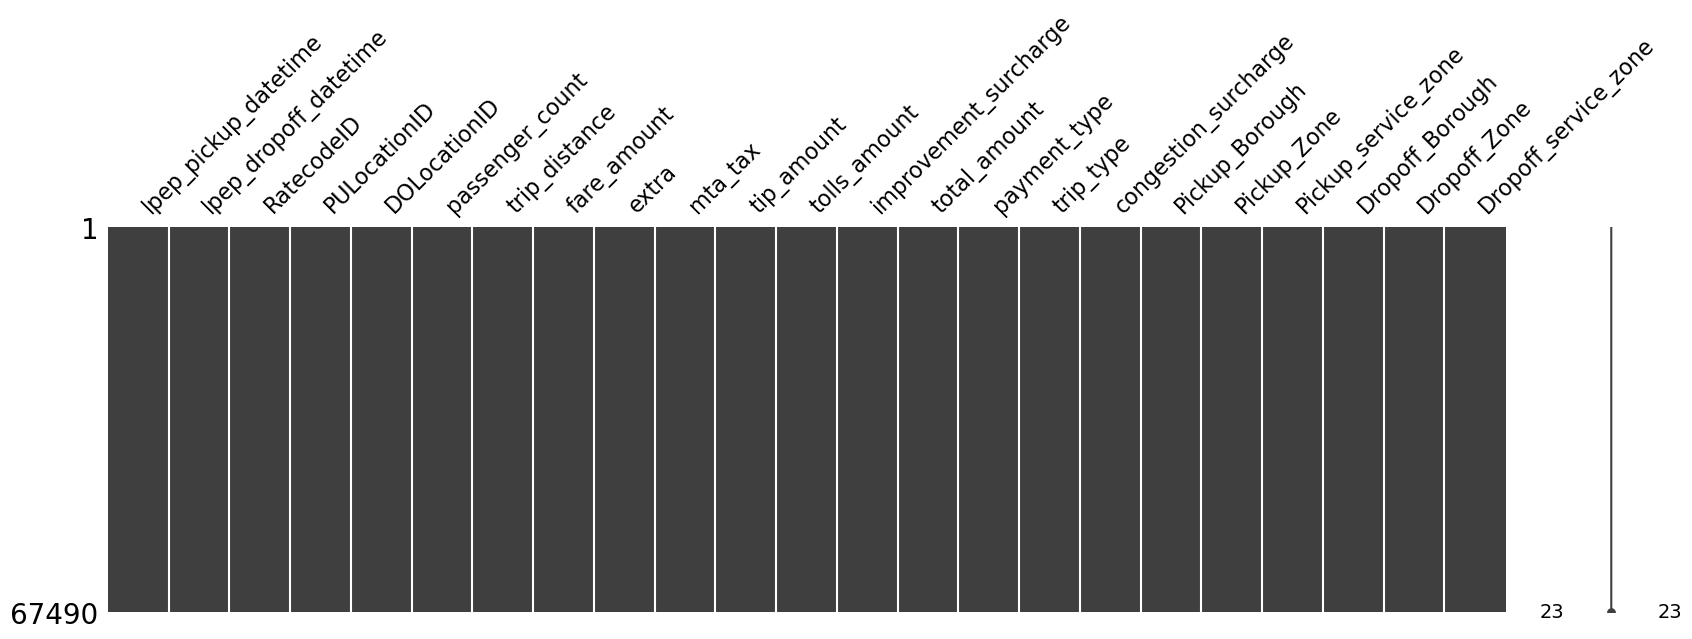

In [52]:
msno.matrix(df, figsize=(20, 5))
plt.show()

Missing Values dari masing-masing kolom sudah diatasi, maka data cleaning selanjutnya akan dilakukan

`Duplicate value`

In [53]:
df.duplicated().sum()

0

Terlihat bahwa tidak terdapat duplicated value pada setiap baris dalam dataset ini. Tetapi untuk membuktikan lebih lanjut diperlukan pengecekan berdasarkan value dari beberapa kolom yang seharusnya tidak memungkinkan memiliki value yang sama secara bersamaan. kolom yang dicek adalah `lpep_pickup_datetime` , `lpep_dropoff_datetime` , `RatecodeID` , `PULocationID` , `DOLocationID` , `passenger_count` , dan `trip_distance`

In [54]:
dupe_by_value = df[df.duplicated(subset=['lpep_pickup_datetime', 'lpep_dropoff_datetime', 'RatecodeID', 'PULocationID', 'DOLocationID', 'passenger_count', 'trip_distance'], keep=False)]
dupe_by_value

,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,...,total_amount,payment_type,trip_type,congestion_surcharge,Pickup_Borough,Pickup_Zone,Pickup_service_zone,Dropoff_Borough,Dropoff_Zone,Dropoff_service_zone
662,2023-01-01 14:58:13,2023-01-01 14:58:39,1.0,75,74,2.0,0.17,-3.0,0.0,-0.5,...,-4.5,3.0,1.0,0.0,Manhattan,East Harlem South,Boro Zone,Manhattan,East Harlem North,Boro Zone
663,2023-01-01 14:58:13,2023-01-01 14:58:39,1.0,75,74,2.0,0.17,3.0,0.0,0.5,...,4.5,3.0,1.0,0.0,Manhattan,East Harlem South,Boro Zone,Manhattan,East Harlem North,Boro Zone
898,2023-01-01 17:24:52,2023-01-01 17:25:12,1.0,193,193,1.0,0.00,-3.0,0.0,-0.5,...,-4.5,4.0,1.0,0.0,Queens,Queensbridge/Ravenswood,Boro Zone,Queens,Queensbridge/Ravenswood,Boro Zone
899,2023-01-01 17:24:52,2023-01-01 17:25:12,1.0,193,193,1.0,0.00,3.0,0.0,0.5,...,4.5,4.0,1.0,0.0,Queens,Queensbridge/Ravenswood,Boro Zone,Queens,Queensbridge/Ravenswood,Boro Zone
1317,2023-01-02 02:05:08,2023-01-02 02:12:57,1.0,129,82,1.0,0.64,-8.6,-1.0,-0.5,...,-11.1,3.0,1.0,0.0,Queens,Jackson Heights,Boro Zone,Queens,Elmhurst,Boro Zone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63545,2023-01-31 19:06:18,2023-01-31 19:06:46,1.0,75,75,2.0,0.08,3.0,2.5,0.5,...,7.0,3.0,1.0,0.0,Manhattan,East Harlem South,Boro Zone,Manhattan,East Harlem South,Boro Zone
63655,2023-01-31 20:29:00,2023-01-31 20:29:14,1.0,74,74,1.0,0.00,-2.5,-0.5,-0.5,...,-3.8,3.0,1.0,0.0,Manhattan,East Harlem North,Boro Zone,Manhattan,East Harlem North,Boro Zone
63656,2023-01-31 20:29:00,2023-01-31 20:29:14,1.0,74,74,1.0,0.00,2.5,0.5,0.5,...,3.8,3.0,1.0,0.0,Manhattan,East Harlem North,Boro Zone,Manhattan,East Harlem North,Boro Zone
63807,2023-01-31 22:44:16,2023-01-31 22:45:18,1.0,256,256,1.0,0.15,-3.7,-1.0,-0.5,...,-6.2,3.0,1.0,0.0,Brooklyn,Williamsburg (South Side),Boro Zone,Brooklyn,Williamsburg (South Side),Boro Zone


Setelah dicek kembali, dalam beberapa kolom, terdapat duplikasi dalam beberapa kolom yang tidak memungkinkan memiliki data yang terduplikat bersamaan seperti jarak , dan setelah dilihat dari dataframe yang terduplikat berdasarkan kolom `lpep_pickup_datetime` , `lpep_dropoff_datetime` , `RatecodeID` , `PULocationID` , `DOLocationID` , `passenger_count` , `trip_distance`, ternyata didapatkan bahwa baris yang terduplikasi tersebut memiliki kolom `fare_amount` dan `total_amount` yang secara numerikal sama tetapi perbedaannya adalah nilainya negatif dan positif. 

Maka dari itu data yang terduplikasi dan memiliki value negatif dalam `fare_amount` dan `total_amount` akan didrop dan yang positif akan dipertahankan.

In [55]:
negatif = (df['fare_amount']<0) & (df['total_amount']<0)
dupe_by_value = dupe_by_value[negatif]

df.drop(dupe_by_value.index, inplace=True)

Setelah didrop data yang terduplikasi berdasarkan `fare_amount` dan `total_amount` , maka dicek kembali apakah masih ada nilai yang bernilai negatif lainnya

In [56]:
pd.DataFrame({
    'column': df.columns.values,
    'negative(%)': [len(df[col][df[col] < 0]) / len(df) * 100 if np.issubdtype(df[col].dtype, np.number) else 0 for col in df.columns]
}).round(4)

,column,negative(%)
0,lpep_pickup_datetime,0.0000
1,lpep_dropoff_datetime,0.0000
2,RatecodeID,0.0000
3,PULocationID,0.0000
4,DOLocationID,0.0000
5,passenger_count,0.0000
6,trip_distance,0.0000
7,fare_amount,0.0074
8,extra,0.0000
9,mta_tax,0.0045


Dikarenakan masih ada value yg bernilai negatif dan persentase nya dibawah 1% maka diputuskan untuk melakukan drop terhadap semua data yang memiliki nilai dibawah 0, selain itu juga yang memiliki nilai negatif adalah kolom mengenai uang, transaksi atau pembayaran sehingga menjadi hal yang tidak biasa

In [57]:
col_negatif = ['fare_amount', 'extra', 'mta_tax', 'tip_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge']

for column in col_negatif:
    df = df[df[column] >= 0]

In [58]:
pd.DataFrame({
    'column': df.columns.values,
    'negative(%)': [len(df[col][df[col] < 0]) / len(df) * 100 if np.issubdtype(df[col].dtype, np.number) else 0 for col in df.columns]
}).round(4)

,column,negative(%)
0,lpep_pickup_datetime,0.0
1,lpep_dropoff_datetime,0.0
2,RatecodeID,0.0
3,PULocationID,0.0
4,DOLocationID,0.0
5,passenger_count,0.0
6,trip_distance,0.0
7,fare_amount,0.0
8,extra,0.0
9,mta_tax,0.0


Sekarang sudah tidak ada kolom yang memiliki value negatif dalam dataset ini

`0 value`

Selanjutnya setelah tidak ada missing values dan data yang terduplikasi, dilakukan pengamatan terhadap kolom-kolom yang memiliki value 0

In [59]:
pd.DataFrame({
    'column': df.columns.values,
    'df_type': df.dtypes.values,
    '0_value(%)': [len(df[col][df[col] == 0]) / len(df) * 100 if np.issubdtype(df[col].dtype, np.number) else 0 for col in df.columns]
}).round(2)

,column,df_type,0_value(%)
0,lpep_pickup_datetime,datetime64[ns],0.00
1,lpep_dropoff_datetime,datetime64[ns],0.00
2,RatecodeID,float64,0.00
3,PULocationID,int64,0.00
4,DOLocationID,int64,0.00
5,passenger_count,float64,0.48
6,trip_distance,float64,4.35
7,fare_amount,float64,0.11
8,extra,float64,59.50
9,mta_tax,float64,8.11


Terlihat bahwa dari dataframe diatas bahwa beberapa kolom memiliki valuenya 0, kolom yang akan diabaikan memiliki value 0 adalah mta_tax, extra, tip_amount, tolls_amount, improvement_surcharge, dan congestion_surcharge karena kolom-kolom tersebut tidak selalu harus memiliki value diatas 0, contohnya seperti:
* tip_amount: tidak selalu setiap pada perjalanan taksi penumpang akan memberikan tips sehingga valuenya 0
* tolls_amount: Perjalanan taksi yang dilakukan tidak selalu menggunakan akses tol sehingga tidak ada biaya tol
* congestion_surcharge: Tidak semua perjalanan taksi melalui zona kemacetan sehingga tidak dibebankan untuk membayar biaya tambahan kepada penumpang

untuk kolom lainnya akan ditangani yang memiliki 0 value, seperti:
* kolom passenger_count yang memiliki 0 akan diisi oleh median dari kolom tersebut karena diasumsikan tidak akan ada perjalanan taksi tanpa penumpang
* kolom trip_distance yang memiliki value 0 akan dianggap tidak ada perjalanan sehingga akan difilter
* kolom fare_amount juga yang memiliki value 0 akan diasumsikan tidak terjadi perjalanan taksi sehingga akan difilter

In [60]:
df['passenger_count'] = df['passenger_count'].replace(0, df['passenger_count'].median())
df = df[df['trip_distance']>0]
df = df[df['fare_amount']>0]

Setelah dilakukan seleksi data, dicek kembali kolom-kolomnya yang awalnya memiliki value 0

In [61]:
pd.DataFrame({
    'column': df.columns.values,
    'df_type': df.dtypes.values,
    '0_value(%)': [len(df[col][df[col] == 0]) / len(df) * 100 if np.issubdtype(df[col].dtype, np.number) else 0 for col in df.columns]
}).round(2)

,column,df_type,0_value(%)
0,lpep_pickup_datetime,datetime64[ns],0.00
1,lpep_dropoff_datetime,datetime64[ns],0.00
2,RatecodeID,float64,0.00
3,PULocationID,int64,0.00
4,DOLocationID,int64,0.00
5,passenger_count,float64,0.00
6,trip_distance,float64,0.00
7,fare_amount,float64,0.00
8,extra,float64,58.47
9,mta_tax,float64,7.64


Setelah dilakukan filter terhadap kolom trip_distance dan fare_amount yang memiliki value 0, total_amount sekarang sudah tidak memiliki value 0 

In [62]:
pd.DataFrame({
    'column': df.columns.values,
    'df_type': df.dtypes.values,
    'null(%)': df.isna().mean().values * 100,
    'negative': [True if df[col].dtype == float and (df[col]< 0).any() else False for col in df.columns],
    '0_value(%)': [len(df[col][df[col] == 0]) / len(df) * 100 if col in df.select_dtypes(include=[np.number]).columns else 0 for col in df.columns],
    'n_unique': df.nunique().values,
    'sample_unique': [df[col].unique() for col in df.columns]
})

,column,df_type,null(%),negative,0_value(%),n_unique,sample_unique
0,lpep_pickup_datetime,datetime64[ns],0.0,False,0.000000,63065,"[2023-01-01 00:26:10, 2023-01-01 00:51:03, 202..."
1,lpep_dropoff_datetime,datetime64[ns],0.0,False,0.000000,62989,"[2023-01-01 00:37:11, 2023-01-01 00:57:49, 202..."
2,RatecodeID,float64,0.0,False,0.000000,5,"[1.0, 5.0, 3.0, 2.0, 4.0]"
3,PULocationID,int64,0.0,False,0.000000,194,"[166, 24, 41, 181, 255, 75, 66, 195, 83, 97, 7..."
4,DOLocationID,int64,0.0,False,0.000000,243,"[143, 43, 238, 74, 262, 45, 75, 166, 140, 234,..."
5,passenger_count,float64,0.0,False,0.000000,8,"[1.0, 2.0, 4.0, 3.0, 6.0, 5.0, 8.0, 7.0]"
6,trip_distance,float64,0.0,False,0.000000,1796,"[2.58, 1.81, 1.3, 1.1, 2.78, 3.8, 1.88, 1.11, ..."
7,fare_amount,float64,0.0,False,0.000000,2365,"[14.9, 10.7, 6.5, 6.0, 17.7, 19.1, 14.2, 7.2, ..."
8,extra,float64,0.0,False,58.468086,12,"[1.0, 0.5, 3.75, 0.0, 3.25, 6.0, 5.0, 2.75, 5...."
9,mta_tax,float64,0.0,False,7.644034,4,"[0.5, 1.5, 0.0, 1.0]"


### `Outliers`

Mencari outlier disetiap kolom numerikal

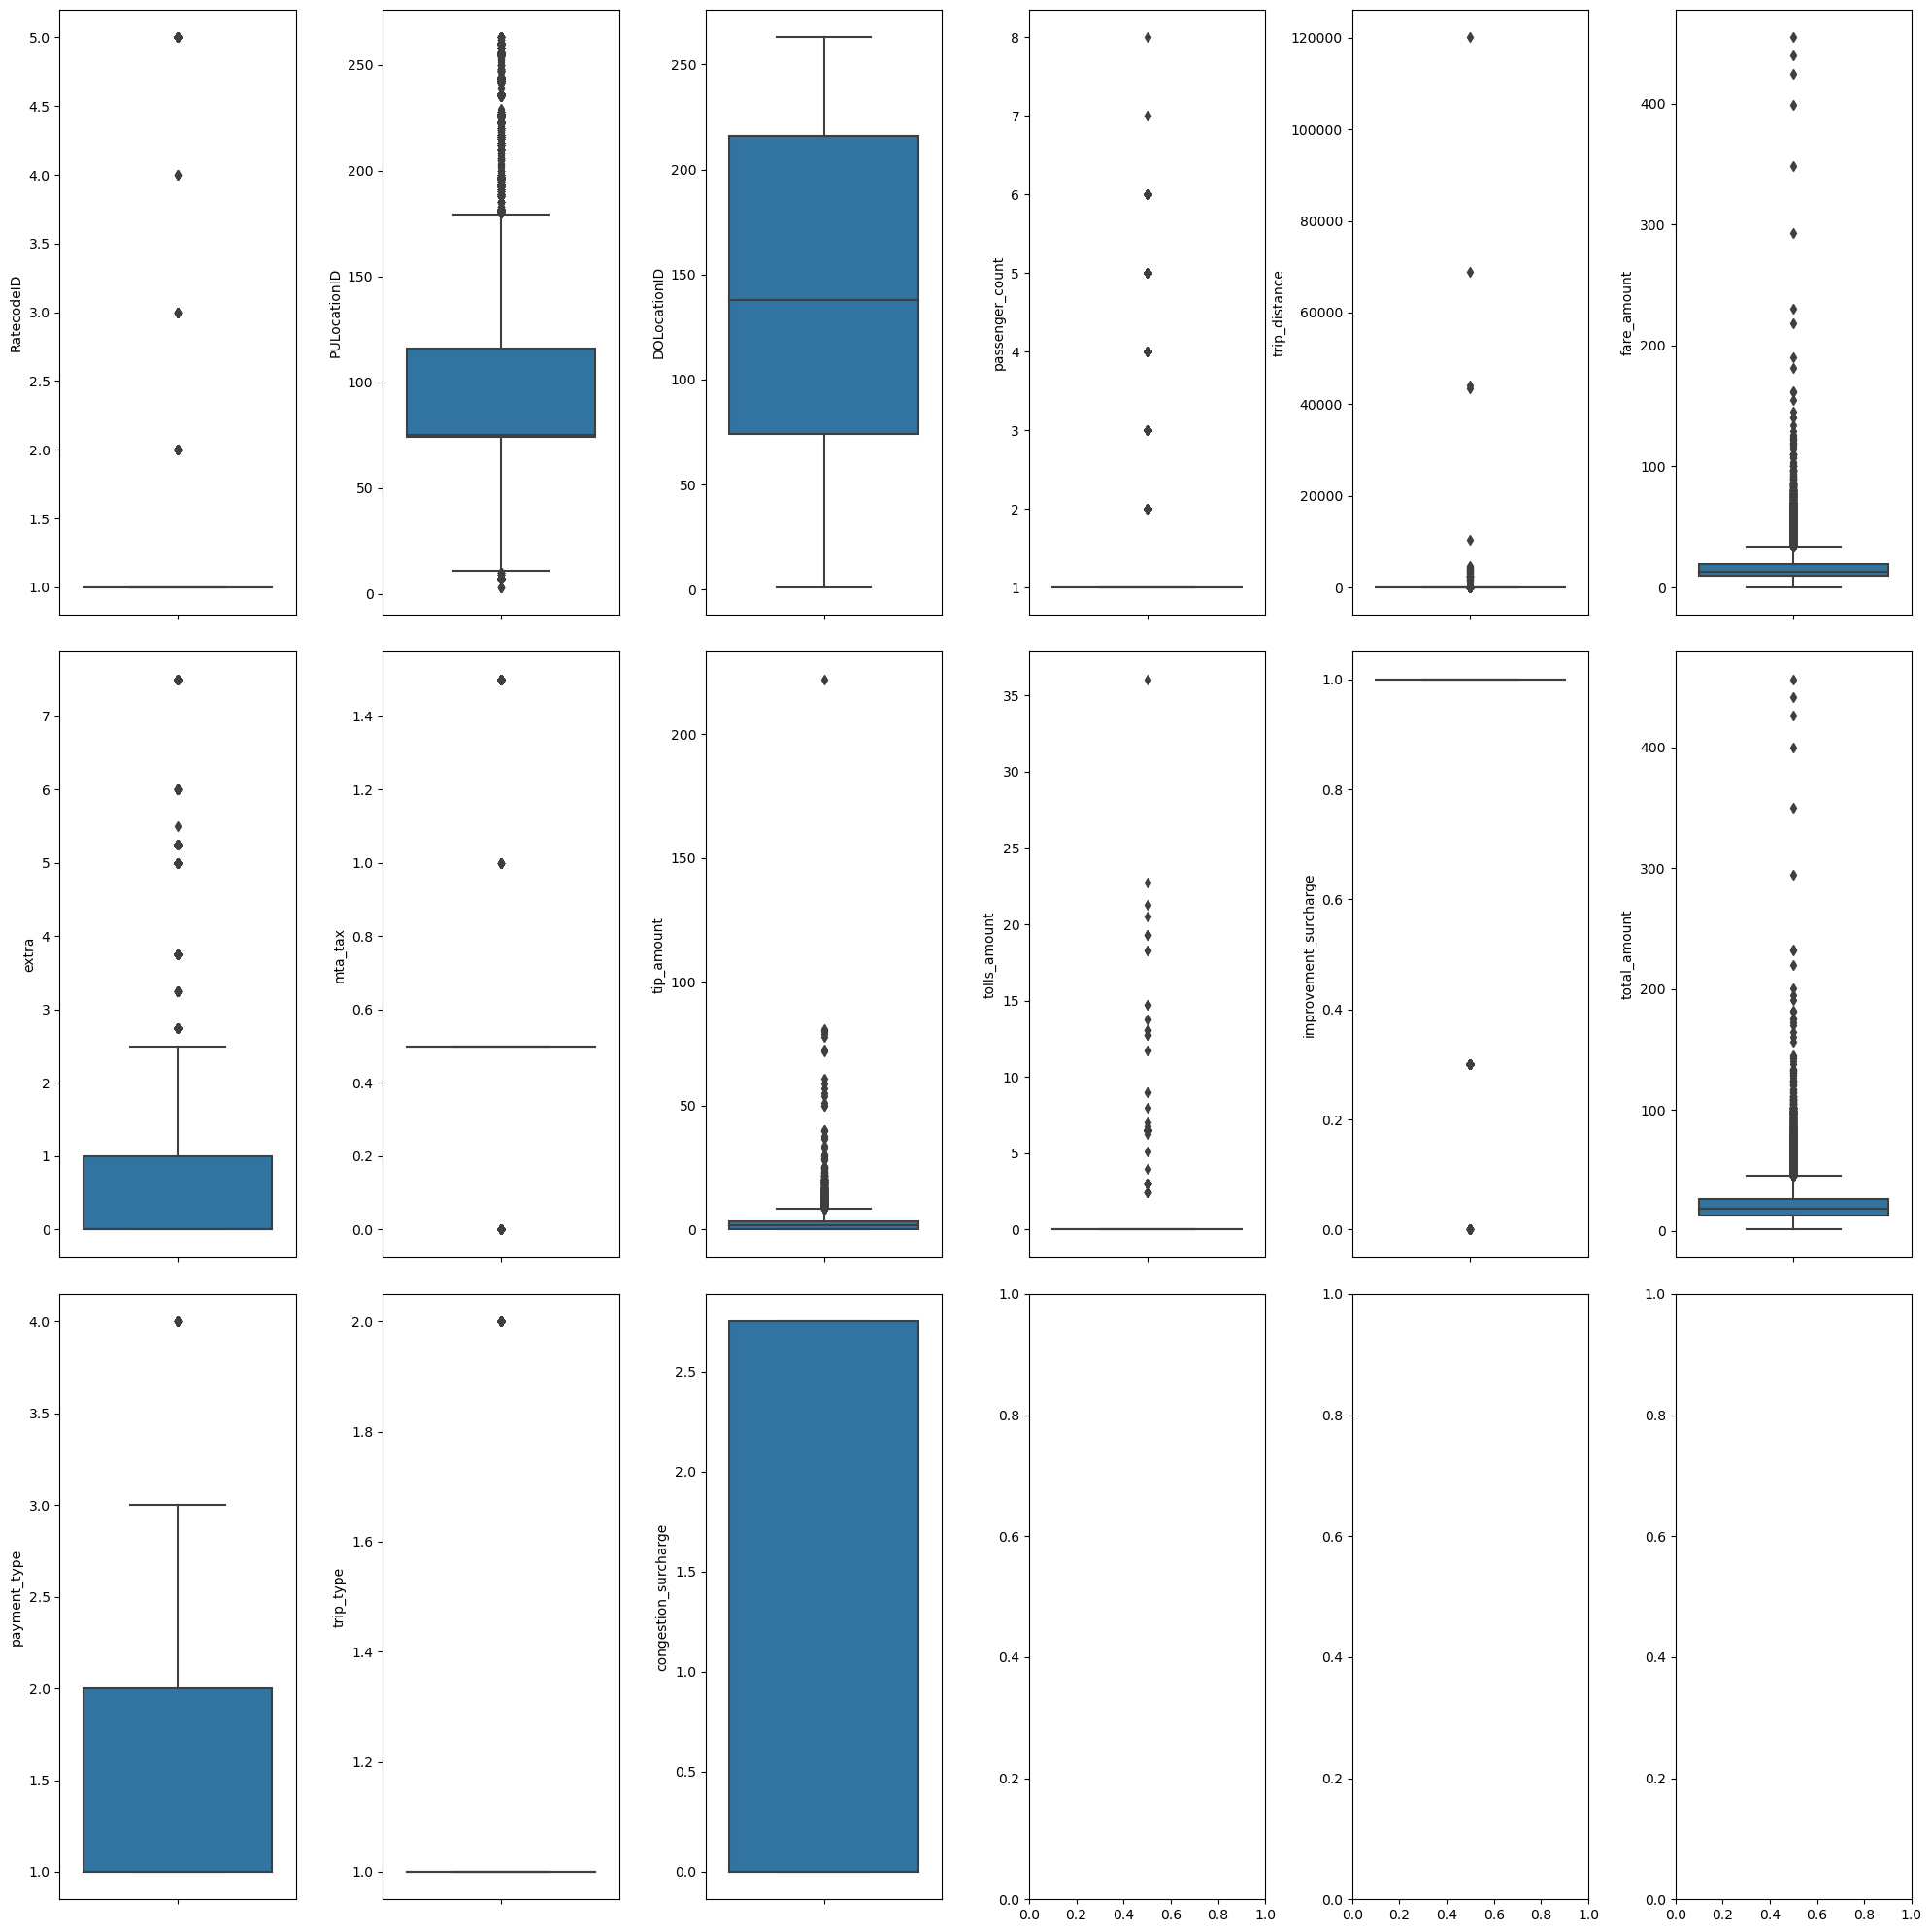

In [63]:
fig, ax = plt.subplots(ncols=6, nrows=3, figsize=(20,20))
col = 0
ax = ax.flatten()
for i, j in df.select_dtypes(include=[np.number]).items():
    sns.boxplot(y=i, data=df, ax=ax[col])
    col += 1
plt.tight_layout(w_pad=0.5, h_pad=2)

Berdasarkang grafik diatas, dapat diambil sebuah _insight_ bahwa dataset dalam analisis ini memiliki _outliers_ hampir pada setiap kolom numerikal. Kemungkinan distribusi data pada dataset ini tidak normal karena memiliki banyak _outliers_, tetapi semua kolom akan tetap diuji normalitasnya. 

In [64]:
num_only = df.select_dtypes(include=['int','float']).columns
for i in num_only :
    print (f'normaltest utuk kolom {i}')
    stat,pvalue = normaltest(df[i])
    alpha = 0.05

    if pvalue > alpha :
        print(f'pvalue={pvalue}.pvalue > {alpha}. Fail to reject H0. Kita dapat asumsikan bawa data terdistribusi normal')
    else :
        print(f'pvalue={pvalue}.pvalue < {alpha}. Reject H0. Kita dapat asumsikan bawa data TIDAK terdistribusi normal')

normaltest utuk kolom RatecodeID
pvalue=0.0.pvalue < 0.05. Reject H0. Kita dapat asumsikan bawa data TIDAK terdistribusi normal
normaltest utuk kolom PULocationID
pvalue=0.0.pvalue < 0.05. Reject H0. Kita dapat asumsikan bawa data TIDAK terdistribusi normal
normaltest utuk kolom DOLocationID
pvalue=0.0.pvalue < 0.05. Reject H0. Kita dapat asumsikan bawa data TIDAK terdistribusi normal
normaltest utuk kolom passenger_count
pvalue=0.0.pvalue < 0.05. Reject H0. Kita dapat asumsikan bawa data TIDAK terdistribusi normal
normaltest utuk kolom trip_distance
pvalue=0.0.pvalue < 0.05. Reject H0. Kita dapat asumsikan bawa data TIDAK terdistribusi normal
normaltest utuk kolom fare_amount
pvalue=0.0.pvalue < 0.05. Reject H0. Kita dapat asumsikan bawa data TIDAK terdistribusi normal
normaltest utuk kolom extra
pvalue=0.0.pvalue < 0.05. Reject H0. Kita dapat asumsikan bawa data TIDAK terdistribusi normal
normaltest utuk kolom mta_tax
pvalue=0.0.pvalue < 0.05. Reject H0. Kita dapat asumsikan bawa dat

Setelah dibuktikan kembali menggunakan uji normalitas, terbukti bahwa semua kolom numerikal dalam dataset ini memiliki distribusi yang tidak normal

In [65]:
numerical = [var for var in df.columns if df[var].dtypes != 'object']
def calculate_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

outlier_df = []

for column in numerical:
    outlier_result, lower_bound, upper_bound = calculate_outliers(df, column)
    total_outlier = len(outlier_result)
    outlier_percentage = round(total_outlier / len(df[column]) * 100, 2)
    outlier_df.append([column, total_outlier, outlier_percentage, lower_bound, upper_bound])

outlier_df = pd.DataFrame(outlier_df, columns=["Column", "Total Outliers", "Percentage (%)", "Lower Bound", "Upper Bound"])
outlier_df

,Column,Total Outliers,Percentage (%),Lower Bound,Upper Bound
0,lpep_pickup_datetime,3,0.00,2022-12-17 19:01:40.500000,2023-02-16 09:30:40.500000
1,lpep_dropoff_datetime,3,0.00,2022-12-17 19:09:36.500000,2023-02-16 09:52:20.500000
2,RatecodeID,1024,1.59,1.0,1.0
3,PULocationID,8867,13.77,11.0,179.0
4,DOLocationID,0,0.00,-139.0,429.0
5,passenger_count,8905,13.83,1.0,1.0
6,trip_distance,5397,8.38,-1.915,6.445
7,fare_amount,4194,6.51,-5.4,33.8
8,extra,3502,5.44,-1.5,2.5
9,mta_tax,12512,19.44,0.5,0.5


Dilihat dari outliernya kolom 'lpep_pickup_datetime' dan 'lpep_dropoff_datetime' memiliki tahun selain 2023

In [66]:
outliers_date = df[(df['lpep_pickup_datetime'].dt.month!=1) | (df['lpep_pickup_datetime'].dt.year!=2023)]
outliers_date

,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,...,total_amount,payment_type,trip_type,congestion_surcharge,Pickup_Borough,Pickup_Zone,Pickup_service_zone,Dropoff_Borough,Dropoff_Zone,Dropoff_service_zone
298,2022-12-09 14:10:49,2022-12-09 14:22:26,1.0,7,56,1.0,5.37,16.0,0.0,0.5,...,16.80,2.0,1.0,0.00,Queens,Astoria,Boro Zone,Queens,Corona,Boro Zone
318,2022-12-09 14:55:42,2022-12-09 15:33:06,1.0,260,164,1.0,5.48,25.5,0.0,0.5,...,35.60,2.0,1.0,2.75,Queens,Woodside,Boro Zone,Manhattan,Midtown South,Yellow Zone
17874,2009-01-01 20:21:27,2009-01-02 11:07:31,1.0,65,178,1.0,7.72,34.5,0.0,0.5,...,43.20,1.0,1.0,0.00,Brooklyn,Downtown Brooklyn/MetroTech,Boro Zone,Brooklyn,Ocean Parkway South,Boro Zone
25100,2023-02-01 03:10:05,2023-02-01 03:40:35,5.0,82,198,2.0,4.58,28.0,0.0,0.0,...,33.96,1.0,2.0,0.00,Queens,Elmhurst,Boro Zone,Queens,Ridgewood,Boro Zone


Karena data tanggal selain tahun 2023 tidak sampai 1 % maka datanya akan dihapus

In [67]:
df.drop(outliers_date.index, inplace=True)

- Dari semua kolom numerikal hanya dua kolom yang tidak memiliki outlier yaitu DOlocationID dan congestion_surcharge

In [68]:
choosen_col = ['passenger_count', 'trip_distance', 'fare_amount', 'tip_amount', 'total_amount']
outlier_info = df[choosen_col].quantile([0.01, 0.99])

outlier_info

,passenger_count,trip_distance,fare_amount,tip_amount,total_amount
0.01,1.0,0.23,4.4,0.0000,6.300
0.99,6.0,13.92,60.4,11.5128,72.278


In [69]:
df[(df['lpep_pickup_datetime'].dt.month!=1) | (df['lpep_pickup_datetime'].dt.year!=2023)]

,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,...,total_amount,payment_type,trip_type,congestion_surcharge,Pickup_Borough,Pickup_Zone,Pickup_service_zone,Dropoff_Borough,Dropoff_Zone,Dropoff_service_zone


Selanjutnya kita akan menghapus data yang memiliki nilai di luar batas yang dianggap wajar berdasarkan persentil 1 dan 99 yang telah kita tentukan. Khusus untuk 'trip_distance' dan 'total_amount', kita akan fokus pada data yang secara signifikan menyimpang dari umumnya

Kita akan hilangkan outlier pada kolom yang menjadi fokus utama yaitu trip_distance dan total_amount karena kolom-kolom ini sangat penting dalam memahami dinamika perjalanan taksi, kolom ini juga  bisa secara signifikan mempengaruhi rata-rata, median, dan statistik lain yang mendasari keputusan bisnis atau analisis lebih lanjut. Misalnya, satu perjalanan yang sangat panjang atau tarif yang sangat tinggi bisa mengacaukan pemahaman tentang tarif rata-rata atau pola perjalanan umum

In [70]:
df = df[
    (df['trip_distance'] >= outlier_info.loc[0.01, 'trip_distance']) &
    (df['trip_distance'] <= outlier_info.loc[0.99, 'trip_distance']) &
    (df['total_amount'] >= outlier_info.loc[0.01, 'total_amount']) &
    (df['total_amount'] <= outlier_info.loc[0.99, 'total_amount'])
]

df.shape

(62546, 23)

Kita juga akan memeriksa kevalidan data pada kolom lain seperti passenger_count dan payment_type untuk memastikan bahwa semua datanya adalah valid.

- passenger_count hanya akan meliputi value antara 1 sampai 5 karena dalam peraturan taksinya tidak diperbolehkannya penumpang yang melebihi dari 5 kecuali ada anak kecil dibawah 7 tahun yang akan digendong selama perjalanan yang ditulis dalam [FAQ](https://www.nyc.gov/site/tlc/passengers/passenger-frequently-asked-questions.page) NYC TLC. 

- payment_type hanya akan meliputi value yang valid (1 = Kartu Kredit, 2 = Tunai)

In [71]:

df = df[
    (df['passenger_count'] >= 1) &
    (df['passenger_count'] <= 5) &
    (df['payment_type'].isin([1, 2]))
]

df.shape

(61382, 23)

In [72]:
numerical = [var for var in df.columns if df[var].dtypes != 'object']
def calculate_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

outlier_df = []

for column in numerical:
    outlier_result, lower_bound, upper_bound = calculate_outliers(df, column)
    total_outlier = len(outlier_result)
    outlier_percentage = round(total_outlier / len(df[column]) * 100, 2)
    outlier_df.append([column, total_outlier, outlier_percentage, lower_bound, upper_bound])

outlier_df = pd.DataFrame(outlier_df, columns=["Column", "Total Outliers", "Percentage (%)", "Lower Bound", "Upper Bound"])
outlier_df

,Column,Total Outliers,Percentage (%),Lower Bound,Upper Bound
0,lpep_pickup_datetime,0,0.00,2022-12-17 19:46:49.249999872,2023-02-16 09:18:57.249999872
1,lpep_dropoff_datetime,0,0.00,2022-12-17 20:02:31,2023-02-16 09:34:39
2,RatecodeID,653,1.06,1.0,1.0
3,PULocationID,8486,13.82,11.0,179.0
4,DOLocationID,0,0.00,-148.0,444.0
5,passenger_count,7581,12.35,1.0,1.0
6,trip_distance,4751,7.74,-1.795,6.325
7,fare_amount,3322,5.41,-5.4,33.8
8,extra,3416,5.57,-1.5,2.5
9,mta_tax,11735,19.12,0.5,0.5


Outliers dalam penelitian ini sudah berkurang.

Outliers mungkin merepresentasikan data yang sangat relevan dari segi bisnis, seperti transaksi besar dan pola perjalanan secara masif. Apabila menghapus semua outliers ini bisa menghilangkan wawasan penting tentang perilaku atau preferensi dari analisis yang sangat bernilai.

In [73]:
#df.to_csv('TRIP TLC NYC CLEAN.csv', index=False)

# **Exploratory Data Analysis (EDA)**

### **Numerical Features**

### `Correlation`

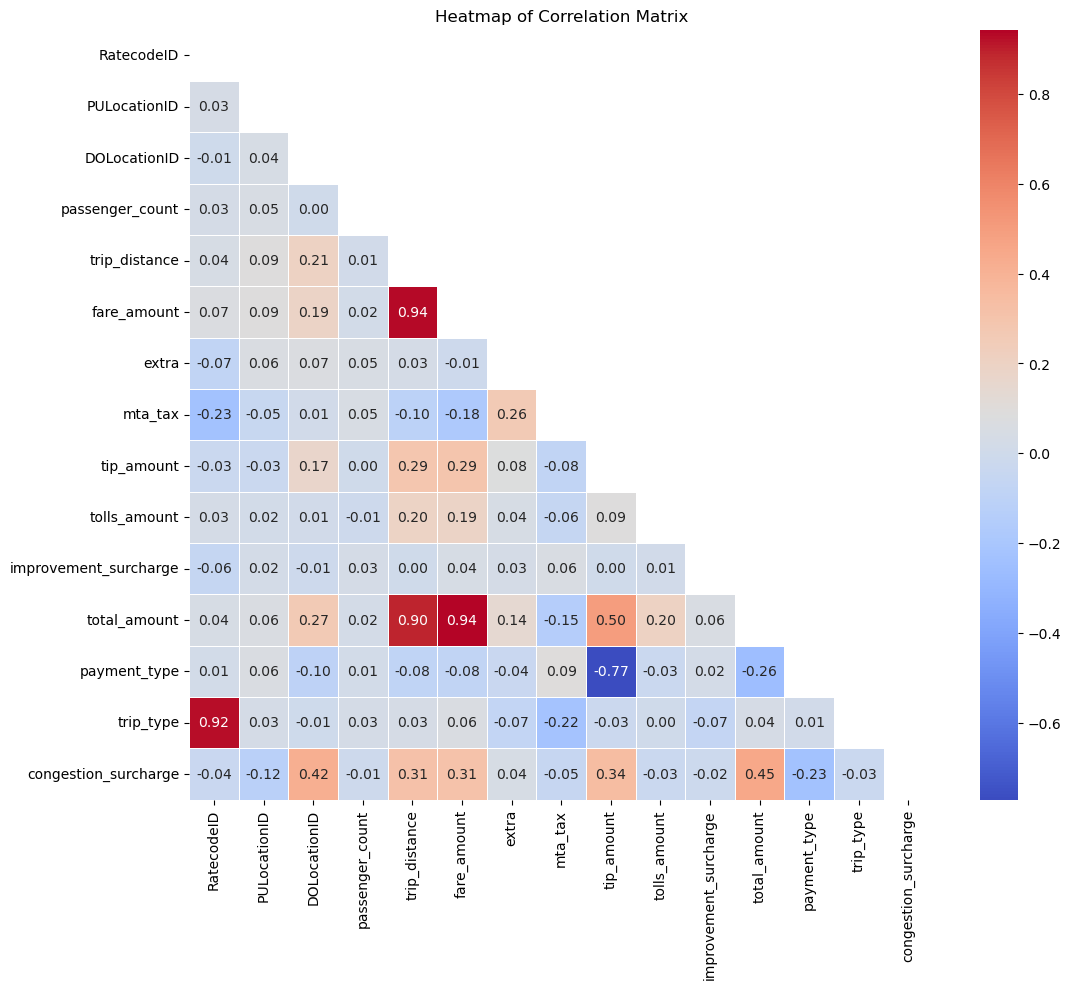

In [74]:
correlation_matrix = df.corr(numeric_only=True, method='spearman')
mask = np.triu(correlation_matrix)
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, mask=mask, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap of Correlation Matrix')
plt.show()


Dari heatmap korelasi di atas, beberapa hubungan yang menarik antara variabel meliputi:

- total_amount memiliki korelasi yang kuat dengan fare_amount, tip_amount, dan tolls_amount. Ini masuk akal karena total_amount merupakan agregasi dari kolom-kolom ini.
- trip_distance menunjukkan korelasi positif yang signifikan dengan fare_amount dan total_amount, yang menunjukkan bahwa semakin jauh jarak perjalanan, semakin tinggi tarif dan total biaya yang dikenakan.
- tip_amount juga berkorelasi dengan fare_amount dan total_amount, mengindikasikan bahwa tips cenderung lebih tinggi untuk tarif yang lebih besar.
- payment_type memiliki korelasi negatif terhadap tip_amount karena metode pembayaran yang lebih sering menerima tip adalah kartu kredit, dimana kode pembayarannya adalah 1 sehingga akan memiliki nilai numerik lebih rendah, menjadikannya berkorelasi negatif dengan tip_amount jika tip lebih sering atau lebih besar diberikan melalui kartu kredit

Kemudian mari kita lihat distribusi mengenai biaya lain-lain dalam perjalanan taksi

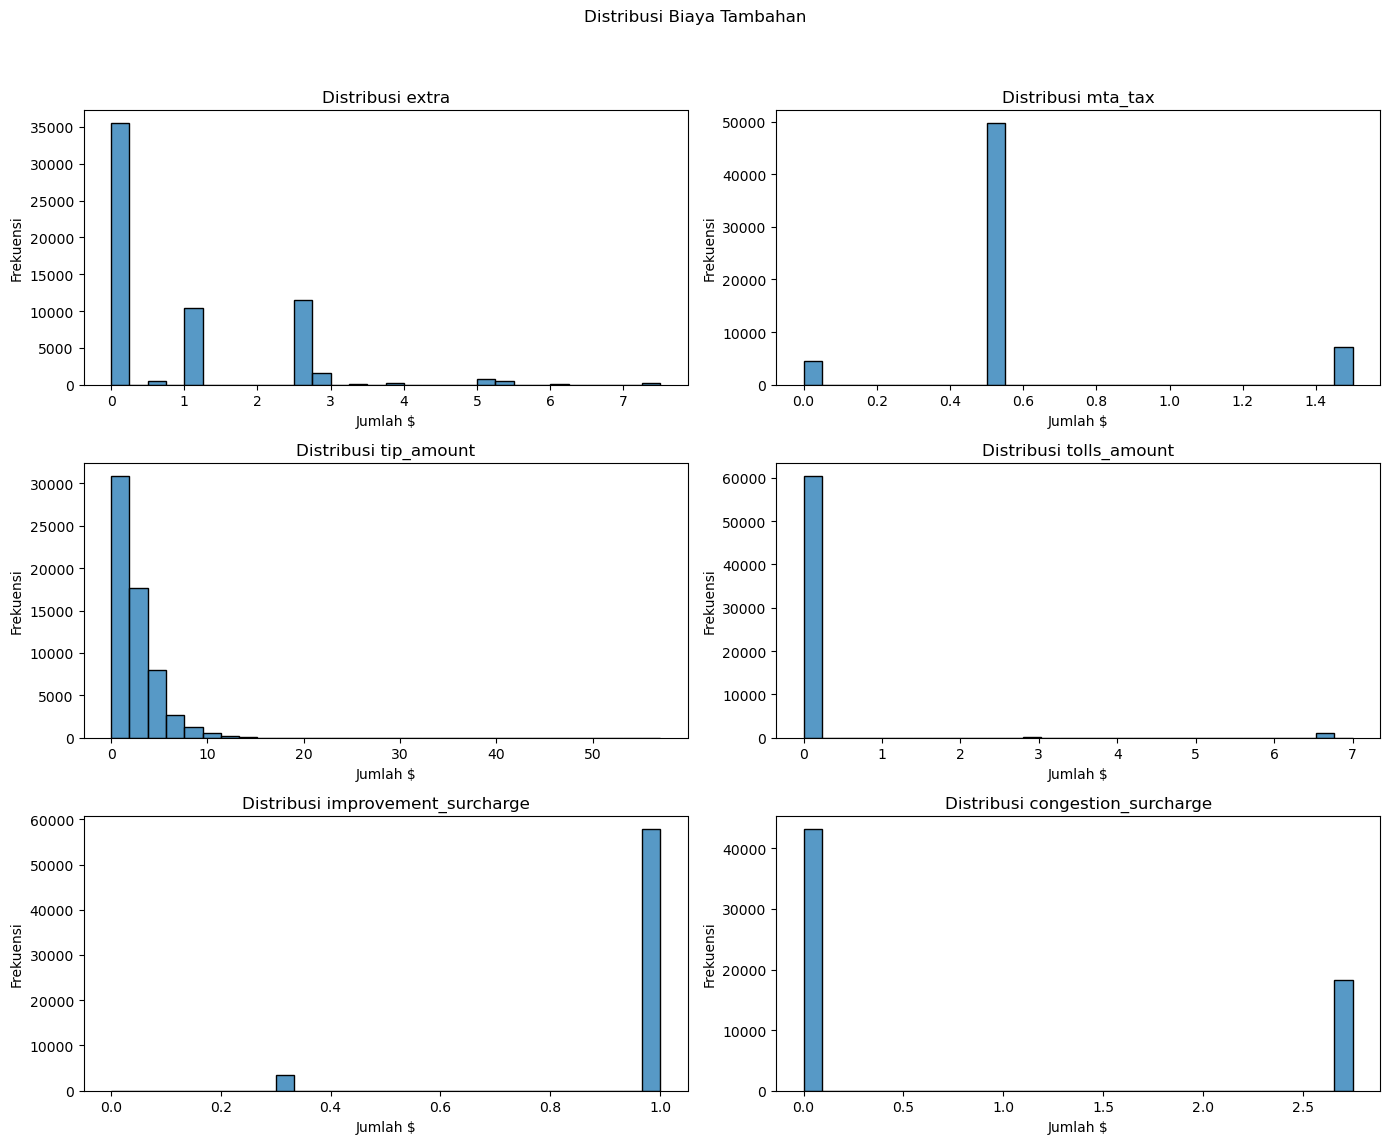

In [75]:
additional_charge = ['extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'congestion_surcharge']

fig, axes = plt.subplots(3, 2, figsize=(14, 12))
fig.suptitle('Distribusi Biaya Tambahan')

for ax, column in zip(axes.flatten(), additional_charge):
    sns.histplot(df[column], bins=30, ax=ax, kde=False)
    ax.set_title(f'Distribusi {column}')
    ax.set_xlabel('Jumlah $')
    ax.set_ylabel('Frekuensi')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Dari visualisasi distribusi yang dihasilkan, kita dapat mengamati beberapa hal tentang biaya tambahan:

* Extra (Biaya Tambahan):

    Rata-rata biaya tambahan adalah $0.87, dengan variasi hingga $7.50.
    Sebagian besar biaya tambahan cenderung kecil, tetapi ada puncak tertentu pada nilai yang lebih tinggi.

* MTA Tax:

    Biaya pajak rata-rata adalah $0.58, dengan kebanyakan tarif berada pada $0.50, menunjukkan standarisasi pajak ini.

* Tip Amount (Jumlah Tip):

    Rata-rata tip adalah $2.13, dengan nilai tip maksimum yang diberikan adalah $57.
    Distribusi tip menunjukkan variasi yang besar, menandakan adanya variasi dalam kepuasan pelanggan atau harga perjalanan.

* Tolls Amount (Biaya Tol):

    Rata-rata biaya tol adalah sekitar $0.11, tetapi beberapa perjalanan memiliki biaya yang jauh lebih tinggi, mencapai $7.

* Improvement Surcharge (Biaya Perbaikan):

    Biaya ini cukup konsisten pada $1, dengan beberapa perkecualian yang tidak memiliki biaya ini.

* Congestion Surcharge (Biaya Kemacetan):

    Rata-rata biaya kemacetan adalah $0.82, dengan nilai maksimal $2.75.
    Ini menunjukkan bahwa biaya kemacetan hanya berlaku untuk area tertentu, dalam kasus ini adalah perjalanan pada Borough di Manhattan

### **Categorical Features**

In [76]:
categorical = [var for var in df.columns if df[var].dtypes == 'object']

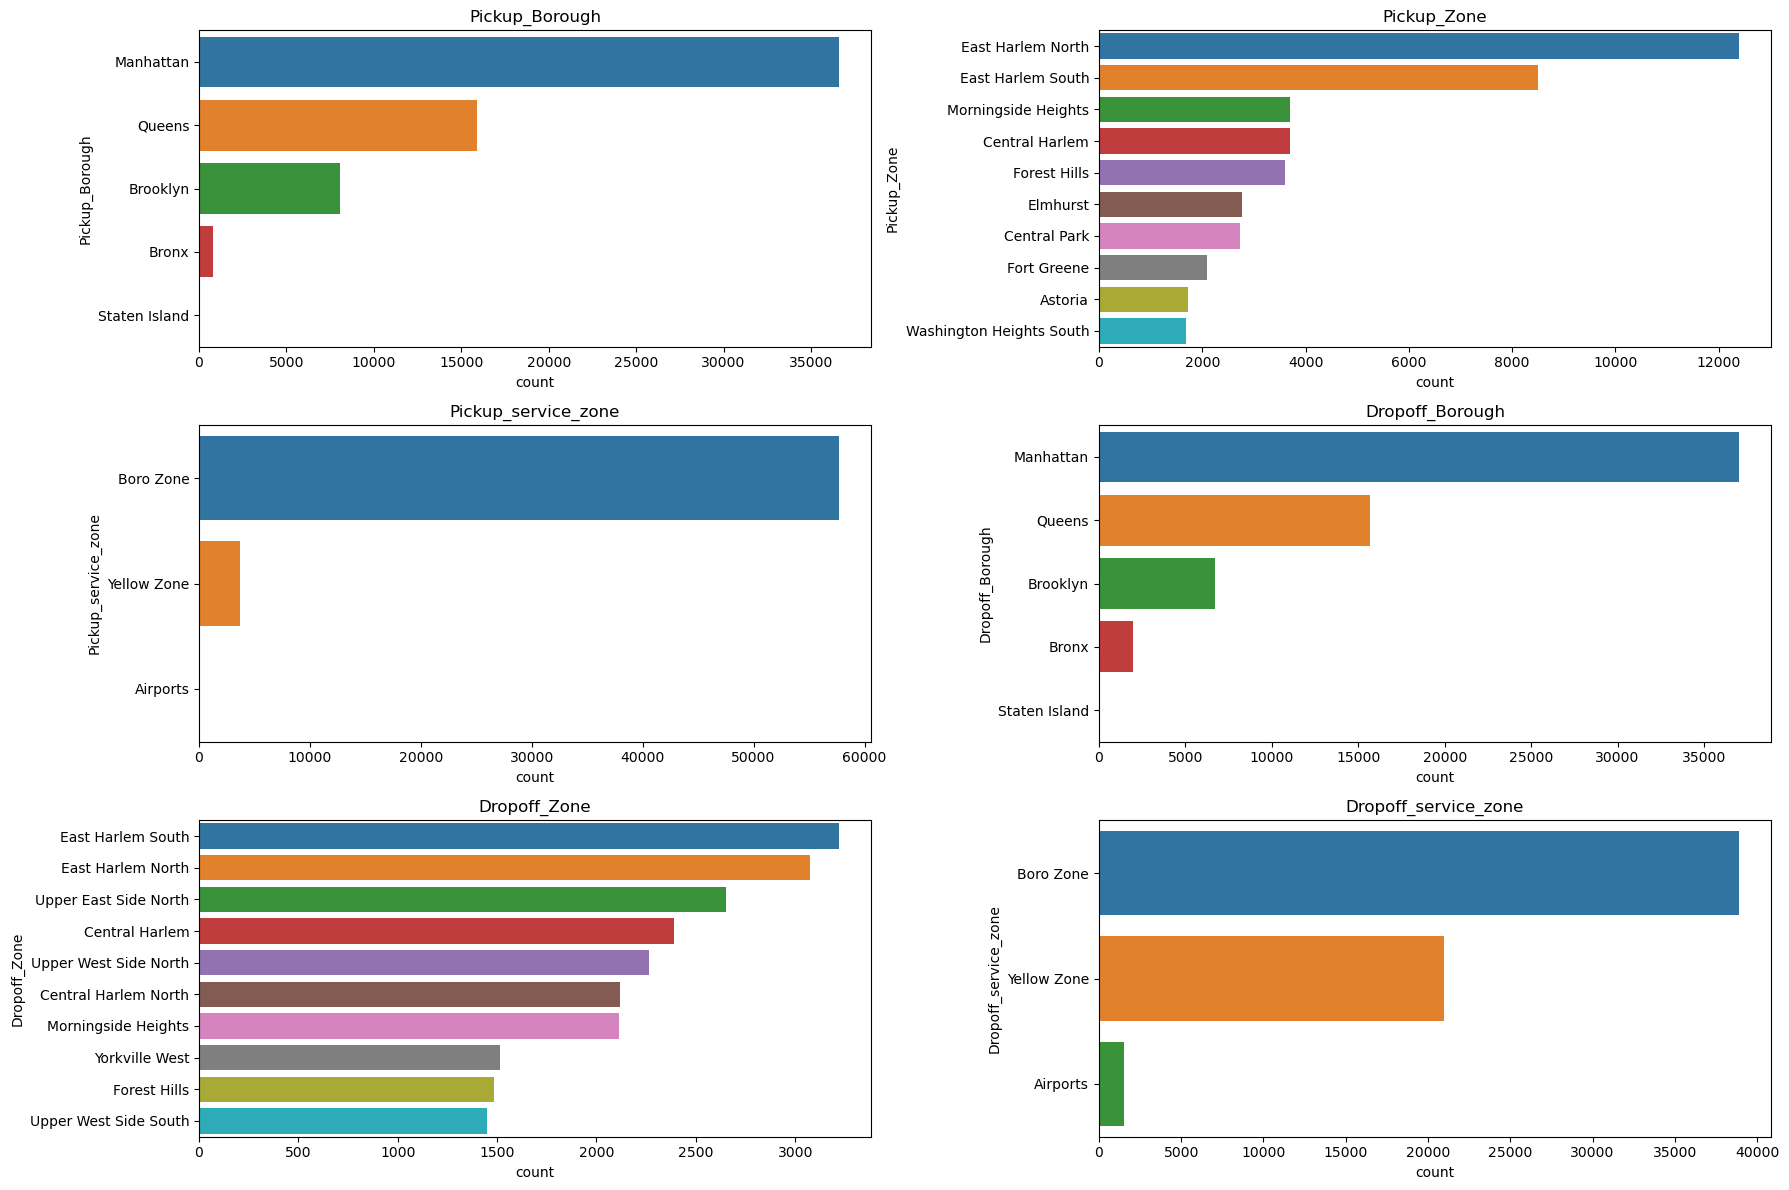

In [77]:
fig, axes = plt.subplots(3, 2, figsize=(18, 12))
axes = axes.flatten()

for i, ax in zip(categorical, axes):
    # Get the top 20 categories based on their counts
    top_categories = df[i].value_counts().nlargest(10).index
    # Create a count plot for the top 20 categories only
    sns.countplot(data=df, y=i, ax=ax, order=top_categories)
    ax.set_title(f'{i}', size=12)

plt.tight_layout()
plt.show()

 Dapat dilihat dari grafik  diatas bahwa:
 - Pickup dam Dropoff terbanyak berasal dari Borough di Manhattan
 - Pickup dam Dropoff terbanyak berasal dari zonanya di East Harlem
 - Pickup dam Dropoff terbanyak berasal dari servie Boro Zone

# **Data Analysis**
Kita sudah melakukan tahap _data cleaning_. Sekarang, kita bisa mulai melakukan analisis untuk mencari tahu bagaimana biaya tambahan lain-lain mempengaruhi perilaku perjalanan pada dataset Trip TLC NYC Record

### **1. Korelasi antara biaya tambahan individu dan total biaya perjalanan**


Kita akan menganalisis korelasi antara biaya tambahan individu dan total biaya perjalanan untuk melihat bagaimana masing-masing kontribusi terhadap total biaya. Hal ini akan membantu kita memahami pengaruh relatif setiap biaya tambahan terhadap total biaya perjalanan

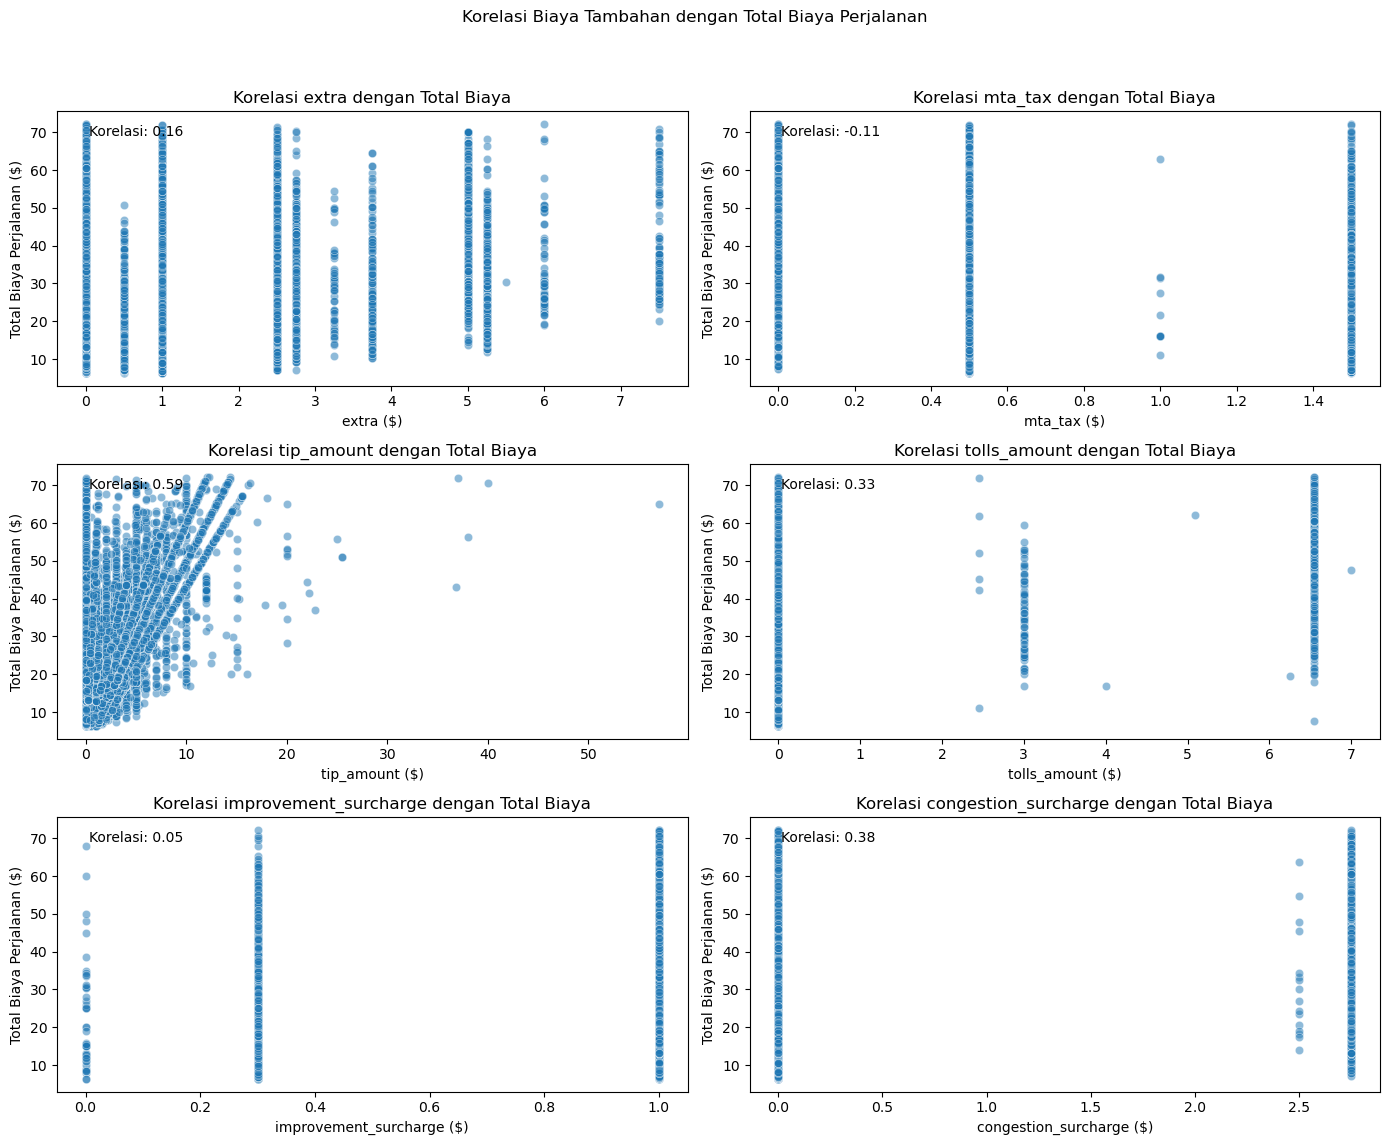

In [78]:
fig, axes = plt.subplots(3, 2, figsize=(14, 12))
fig.suptitle('Korelasi Biaya Tambahan dengan Total Biaya Perjalanan')

for ax, column in zip(axes.flatten(), additional_charge):
    sns.scatterplot(data=df, x=column, y='total_amount', ax=ax, alpha=0.5)
    ax.set_title(f'Korelasi {column} dengan Total Biaya')
    ax.set_xlabel(f'{column} ($)')
    ax.set_ylabel('Total Biaya Perjalanan ($)')

    correlation_coefficient = df[column].corr(df['total_amount'])
    ax.text(0.05, 0.95, f'Korelasi: {correlation_coefficient:.2f}', transform=ax.transAxes, verticalalignment='top')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


Visualisasi scatter plots di atas menunjukkan hubungan antara masing-masing biaya tambahan dan total biaya perjalanan. Korelasi antara setiap biaya tambahan dan total biaya menunjukkan berbagai tingkat pengaruh:

1. extra dan tip_amount menunjukkan korelasi yang lebih tinggi, yang menunjukkan bahwa biaya-biaya ini memiliki kontribusi signifikan terhadap total biaya perjalanan. Ini masuk akal mengingat tip biasanya diberikan berdasarkan persentase dari tarif, dan biaya tambahan sering kali diterapkan dalam situasi tarif yang lebih tinggi.

2. mta_tax, improvement_surcharge, dan congestion_surcharge menunjukkan korelasi yang lebih rendah tetapi masih signifikan, mengindikasikan bahwa meskipun mereka adalah biaya tetap atau lebih kecil, mereka tetap memiliki peran dalam menentukan total biaya perjalanan.

3. tolls_amount juga menunjukkan korelasi yang signifikan, menandakan perjalanan yang melibatkan tol sering kali lebih mahal secara keseluruhan, mungkin karena jarak yang lebih jauh.

#### **Trip_distance terhadap biaya tambahan**

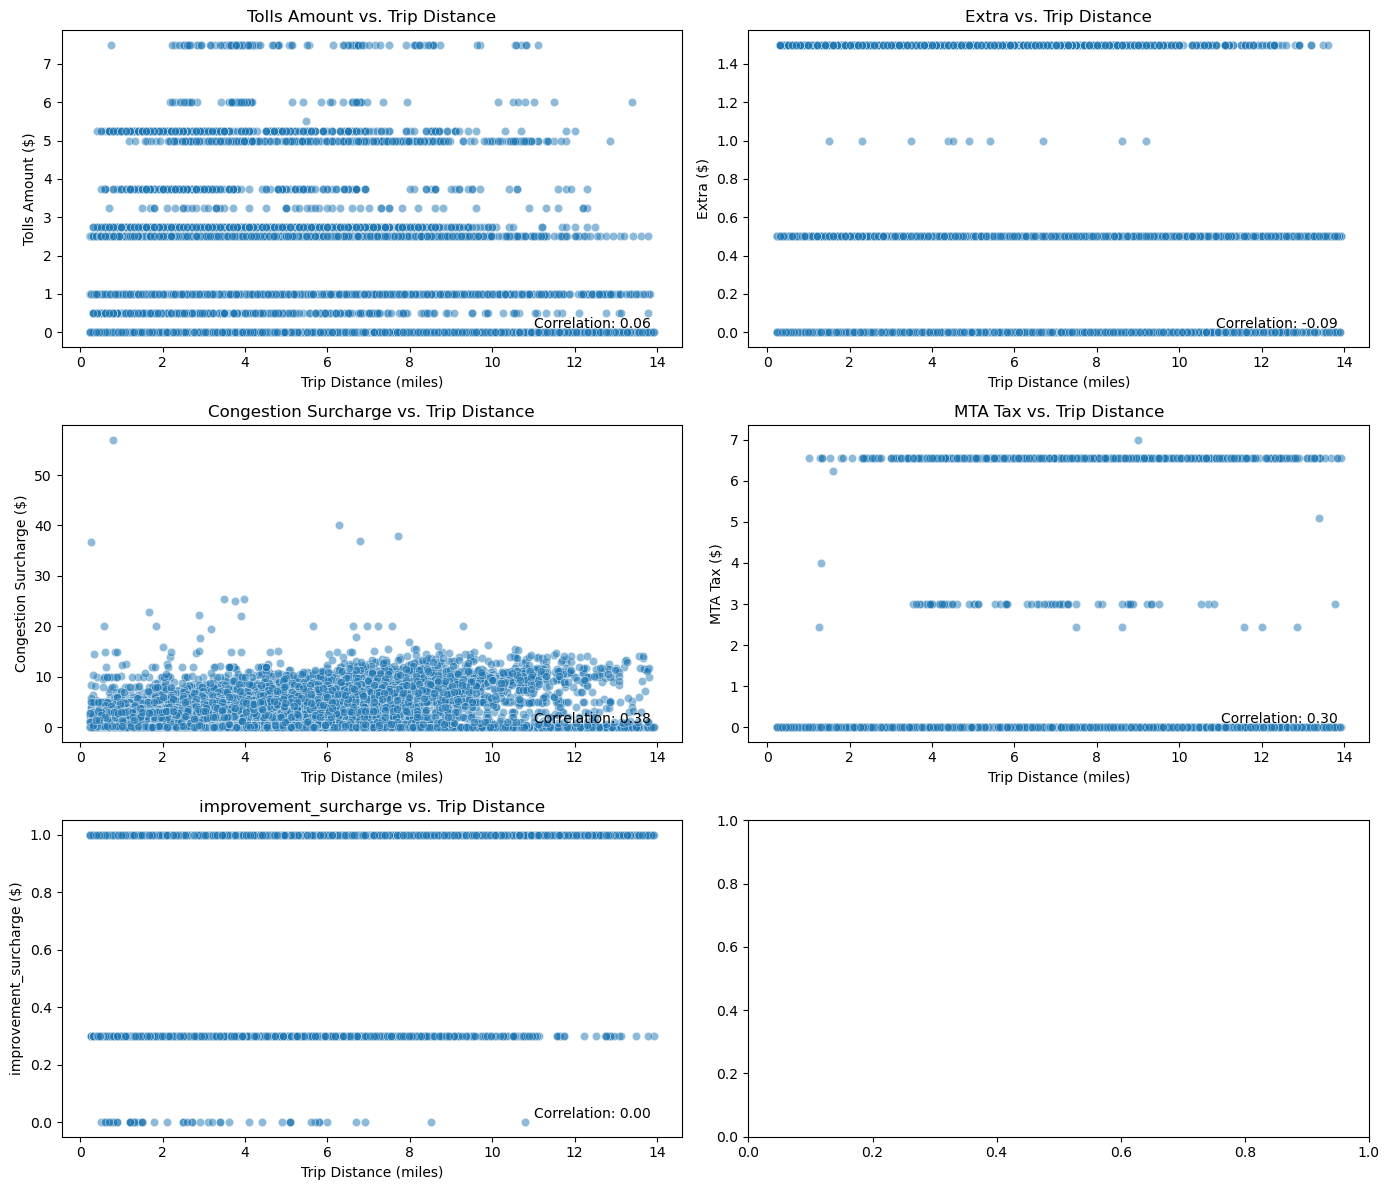

In [79]:

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 12))
titles = ['Tolls Amount', 'Extra', 'Congestion Surcharge', 'MTA Tax', 'improvement_surcharge']

for ax, charge, title in zip(axes.flatten(), additional_charge, titles):
    sns.scatterplot(x='trip_distance', y=charge, data=df, ax=ax, alpha=0.5)
    ax.set_title(f'{title} vs. Trip Distance')
    ax.set_xlabel('Trip Distance (miles)')
    ax.set_ylabel(f'{title} ($)')
    correlation = df['trip_distance'].corr(df[charge])
    ax.text(0.95, 0.05, f'Correlation: {correlation:.2f}', transform=ax.transAxes, ha='right', va='bottom')

plt.tight_layout()
plt.show()


Berdasarkan grafik diatas dapat dilihat bawha:

Tolls Amount: Terdapat korelasi positif antara jarak perjalanan dan tolls_amount, yang masuk akal mengingat perjalanan yang lebih jauh mungkin melewati lebih banyak jalan tol.

Extra: Korelasi antara jarak perjalanan dan extra menunjukkan bahwa ada kenaikan biaya extra untuk beberapa perjalanan yang lebih jauh, meskipun korelasinya tidak terlalu kuat.

Congestion Surcharge: Korelasi antara jarak perjalanan dan congestion_surcharge menunjukkan beberapa ketergantungan, mungkin mengindikasikan bahwa perjalanan yang lebih panjang melewati zona dengan tarif kemacetan.

MTA Tax: Tampaknya tidak ada hubungan yang kuat antara jarak perjalanan dengan mta_tax, yang sesuai karena MTA tax umumnya merupakan biaya tetap yang tidak bergantung pada jarak.

improvement_surcharge : Korelasi antara jarak perjalanan dan improvement_surcharge sangat rendah, menunjukkan tidak ada hubungan yang signifikan antara keduanya. Hal ini masuk akal karena improvement_surcharge biasanya merupakan biaya tetap yang dikenakan pada setiap perjalanan tanpa memandang jarak

### **2. Tren Waktu terhadap biaya tambahan**

#### **Tren harian biaya tambahan selama satu bulan**

Untuk menganalisis tren biaya tambahan selama satu bulan, kita dapat memeriksa bagaimana biaya-biaya tambahan ini berfluktuasi dari hari ke hari selama satu bulan penuh. Kita akan fokus pada data tanggal dari lpep_pickup_datetime untuk melihat bagaimana setiap biaya tambahan berubah seiring waktu

In [80]:
df['pickup_date'] = pd.to_datetime(df['lpep_pickup_datetime']).dt.date

In [81]:
filtered_data_by_year = df[df['pickup_date'].apply(lambda x: x.year) == 2023]

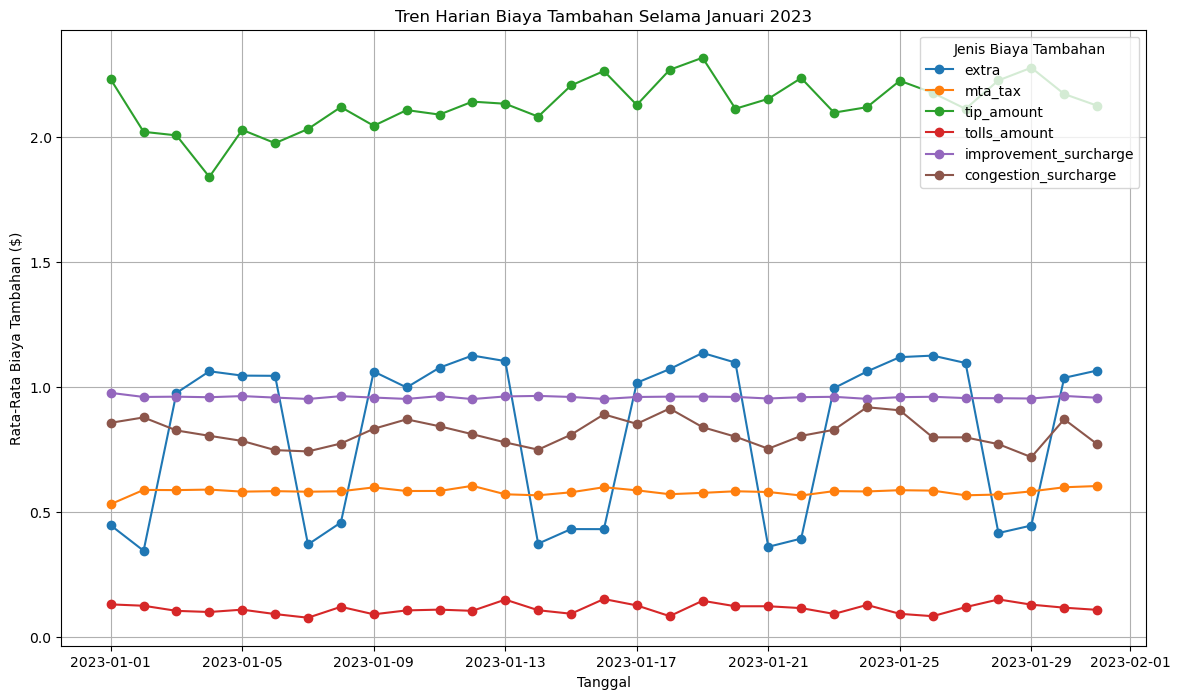

In [82]:
daily_additional_charges_filtered = filtered_data_by_year.groupby('pickup_date')[additional_charge].mean()

daily_additional_charges_filtered.plot(figsize=(14, 8), marker='o', linestyle='-')
plt.title('Tren Harian Biaya Tambahan Selama Januari 2023')
plt.xlabel('Tanggal')
plt.ylabel('Rata-Rata Biaya Tambahan ($)')
plt.grid(True)
plt.legend(title='Jenis Biaya Tambahan')
plt.show()


Grafik di atas menampilkan tren harian biaya tambahan selama bulan Januari 2023. Dari visualisasi, kita dapat mengamati beberapa pola dan fluktuasi dalam biaya tambahan yang berbeda:

- Terlihat bahwa ada fluktuasi harian yang signifikan dalam biaya tambahan seperti extra, congestion_surcharge, dan lainnya. Hal ini mungkin dipengaruhi oleh perubahan dalam permintaan, kepadatan lalu lintas, atau kegiatan khusus dalam kota.

- Congestion surcharge menunjukkan variasi yang cukup besar, yang bisa menunjukkan adanya hari dengan kemacetan lalu lintas yang lebih tinggi. Sementara itu, extra dan mta_tax tampaknya memiliki tren yang lebih stabil tetapi masih menunjukkan beberapa puncak dan lembah.

#### **Tren waktu spesifik terhadap biaya tambahan**

analisis selanjutnya dilakukan untuk melihat apakah ada pola waktu tertentu ketika biaya tambahan lebih sering atau lebih besar dikenakan. Kita akan fokus pada dua aspek utama:

1. Variasi Biaya Tambahan Berdasarkan Waktu dalam Hari:
Menganalisis bagaimana biaya tambahan bervariasi tergantung pada jam dalam hari.
2. Variasi Biaya Tambahan Berdasarkan Hari dalam Minggu:
Menganalisis bagaimana biaya tambahan bervariasi tergantung pada hari dalam seminggu.

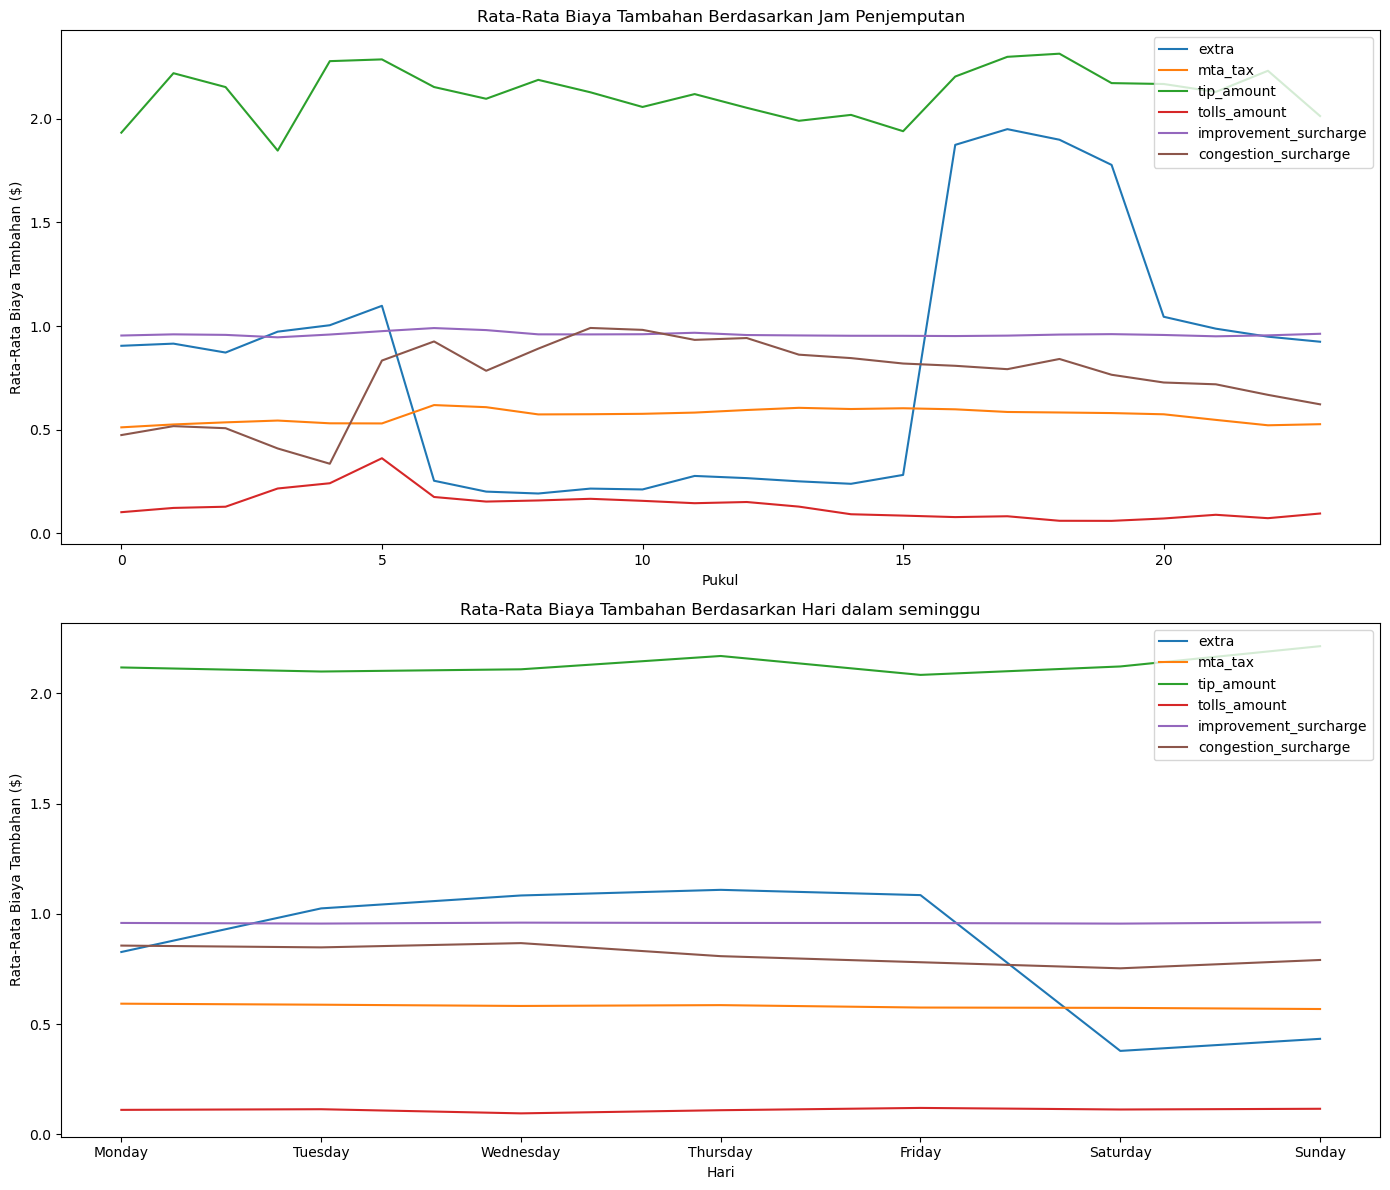

In [83]:
df['pickup_hour'] = pd.to_datetime(df['lpep_pickup_datetime']).dt.hour
df['day_of_week'] = pd.to_datetime(df['lpep_pickup_datetime']).dt.day_name()

hourly_additional_charges = df.groupby('pickup_hour')[additional_charge].mean()

days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
df['day_of_week'] = pd.Categorical(df['day_of_week'], categories=days_order, ordered=True)
weekly_additional_charges = df.groupby('day_of_week')[additional_charge].mean()

fig, ax = plt.subplots(2, 1, figsize=(14, 12))

for column in additional_charge:
    ax[0].plot(hourly_additional_charges.index, hourly_additional_charges[column], label=column)
ax[0].set_title('Rata-Rata Biaya Tambahan Berdasarkan Jam Penjemputan')
ax[0].set_xlabel('Pukul')
ax[0].set_ylabel('Rata-Rata Biaya Tambahan ($)')
ax[0].legend(loc='upper right')

for column in additional_charge:
    ax[1].plot(weekly_additional_charges.index, weekly_additional_charges[column], label=column)
ax[1].set_title('Rata-Rata Biaya Tambahan Berdasarkan Hari dalam seminggu')
ax[1].set_xlabel('Hari')
ax[1].set_ylabel('Rata-Rata Biaya Tambahan ($)')
ax[1].legend(loc='upper right')

plt.tight_layout()
plt.show()


Dari grafik diatas, kita dapat melihat beberapa pola menarik tentang bagaimana biaya tambahan bervariasi berdasarkan waktu dalam hari dan hari dalam seminggu:

1. Variasi Biaya Tambahan Berdasarkan Waktu dalam Hari:
    - Jam Sibuk: Terdapat peningkatan biaya tambahan seperti extra dan congestion_surcharge selama jam-jam sibuk di pagi dan sore hari, yang sesuai dengan jam berangkat dan pulang kerja. Ini mengindikasikan bahwa biaya tambahan lebih sering dikenakan saat permintaan transportasi tinggi.
    
    - Malam Hari: Tampak ada penurunan dalam beberapa biaya seperti congestion_surcharge di malam hari, tetapi extra bisa meningkat, mungkin karena tarif malam.

2. Variasi Biaya Tambahan Berdasarkan Hari dalam Minggu:
    - Akhir Pekan: Biaya tambahan seperti tip_amount dan extra cenderung lebih tinggi pada hari Jumat dan Sabtu, yang bisa mencerminkan aktivitas sosial yang lebih tinggi dan perjalanan malam hari.
    
    - Hari Kerja: Biaya seperti congestion_surcharge tampak lebih tinggi selama hari kerja, khususnya pada pertengahan minggu, yang mungkin karena kepadatan lalu lintas di area bisnis.

### **3. Perbandingan antara biaya tambahan yang dikenakan di berbagai wilayah penjemputan dan pengantaran**

Dilanjutkan dengan menganalisis perbedaan biaya tambahan berdasarkan wilayah penjemputan dan pengantaran. Ini akan membantu kita memahami apakah ada variasi geografis dalam penerapan biaya tambahan, yang mungkin mencerminkan perbedaan dalam kebijakan lokal, biaya infrastruktur, atau pola permintaan transportasi.

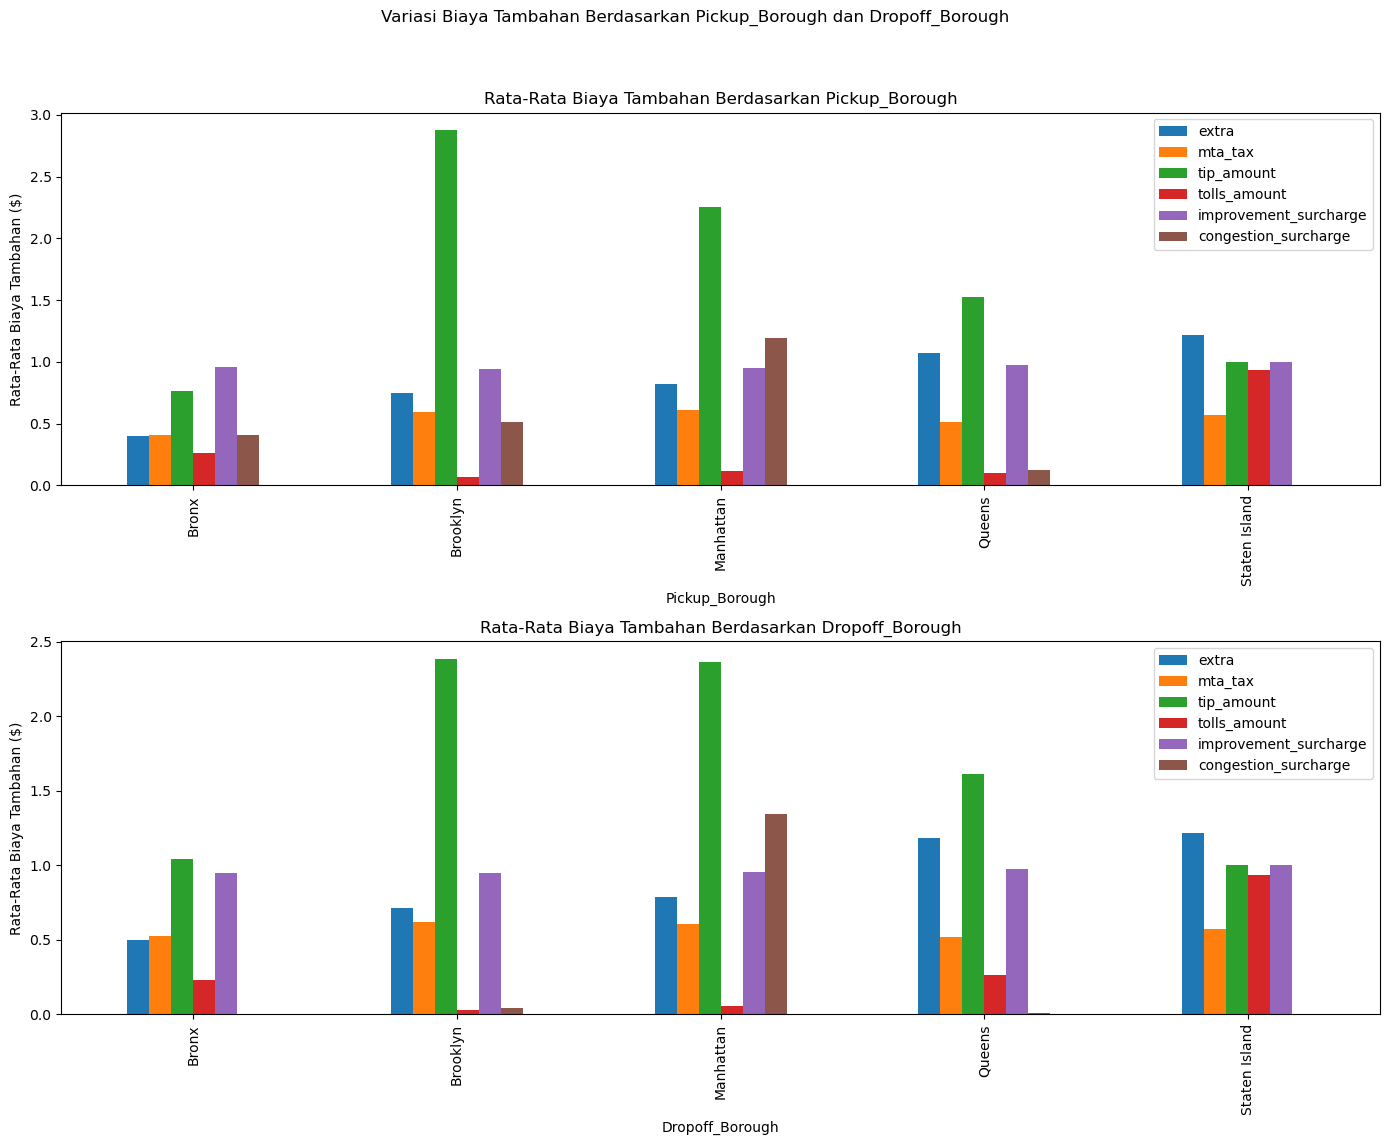

In [84]:

borough_pickup_charges = df.groupby('Pickup_Borough')[additional_charge].mean()


borough_dropoff_charges = df.groupby('Dropoff_Borough')[additional_charge].mean()


fig, ax = plt.subplots(2, 1, figsize=(14, 12))
fig.suptitle('Variasi Biaya Tambahan Berdasarkan Pickup_Borough dan Dropoff_Borough')


borough_pickup_charges.plot(kind='bar', ax=ax[0])
ax[0].set_title('Rata-Rata Biaya Tambahan Berdasarkan Pickup_Borough')
ax[0].set_xlabel('Pickup_Borough')
ax[0].set_ylabel('Rata-Rata Biaya Tambahan ($)')
ax[0].legend(loc='upper right')


borough_dropoff_charges.plot(kind='bar', ax=ax[1])
ax[1].set_title('Rata-Rata Biaya Tambahan Berdasarkan Dropoff_Borough')
ax[1].set_xlabel('Dropoff_Borough')
ax[1].set_ylabel('Rata-Rata Biaya Tambahan ($)')
ax[1].legend(loc='upper right')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


Grafik di atas menampilkan variasi biaya tambahan berdasarkan wilayah penjemputan dan pengantaran:

1. Variasi Biaya Tambahan Berdasarkan Wilayah Penjemputan:

Grafik menunjukkan perbedaan yang signifikan dalam biaya tambahan antar wilayah penjemputan. Ini bisa mencerminkan perbedaan dalam kebijakan tarif lokal, kepadatan lalu lintas, atau faktor-faktor lain seperti jarak rata-rata perjalanan yang berasal dari wilayah tersebut.

2. Variasi Biaya Tambahan Berdasarkan Wilayah Pengantaran:

Serupa dengan penjemputan, variasi dalam biaya tambahan berdasarkan wilayah pengantaran juga signifikan. Perbedaan ini mungkin lebih dipengaruhi oleh biaya tol atau faktor geografis lainnya yang berpengaruh saat memasuki atau meninggalkan wilayah tertentu.

Analisis ini membantu mengidentifikasi bagaimana biaya tambahan tidak hanya dipengaruhi oleh waktu tapi juga oleh lokasi geografis penjemputan dan pengantaran. Pemahaman ini dapat membantu perusahaan taksi dan pembuat kebijakan untuk menyesuaikan strategi penetapan harga berdasarkan kebutuhan dan kondisi lokal, serta untuk meningkatkan keadilan dan transparansi dalam struktur tarif

### **4. Pengaruh fitur lainnya terhadap biaya tambahan**

#### **Analisis passenger_count mempengaruhi biaya tambahan**

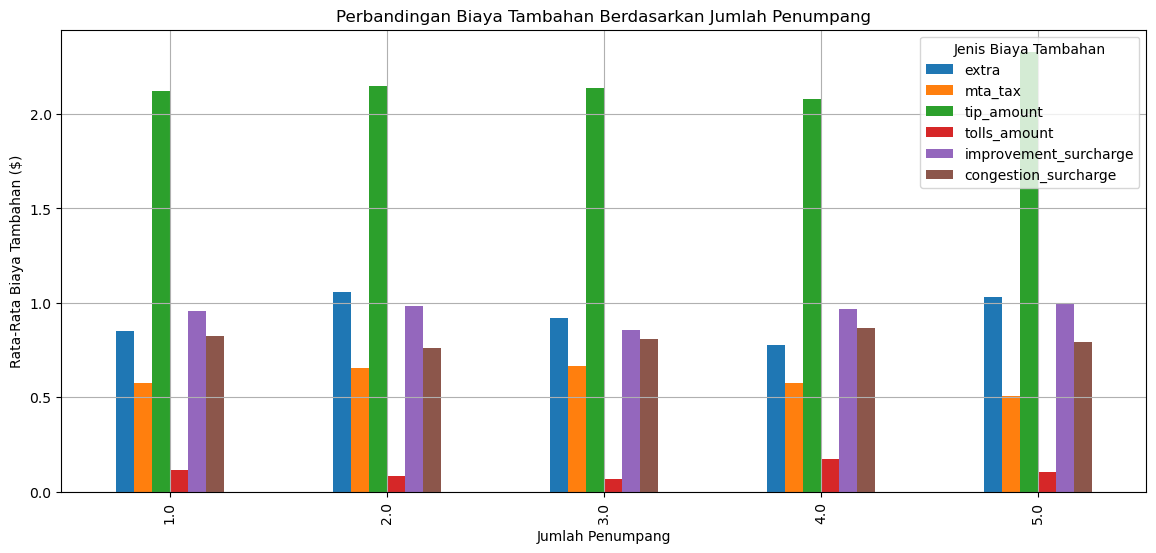

In [85]:
passenger_count_charges = df.groupby('passenger_count')[additional_charge].mean()

passenger_count_charges.plot(kind='bar', figsize=(14, 6))
plt.title('Perbandingan Biaya Tambahan Berdasarkan Jumlah Penumpang')
plt.xlabel('Jumlah Penumpang')
plt.ylabel('Rata-Rata Biaya Tambahan ($)')
plt.legend(title='Jenis Biaya Tambahan')
plt.grid(True)
plt.show()


Grafik di atas menampilkan perbandingan biaya tambahan berdasarkan passenger_count. Kita dapat melihat beberapa pola yaitu:

1. Biaya Tambahan: Tidak ada perubahan yang signifikan dalam biaya seperti mta_tax dan improvement_surcharge tergantung pada jumlah penumpang, yang konsisten di semua kelompok karena biaya ini tidak dipengaruhi oleh jumlah penumpang.

2. Biaya Ekstra: Ada variasi kecil dalam extra di antara kelompok jumlah penumpang yang berbeda. Namun, perbedaan ini tidak terlalu signifikan, yang mungkin menunjukkan bahwa biaya extra umumnya tidak sangat dipengaruhi oleh jumlah penumpang.

3. Pola Tertentu: Grafik menunjukkan sedikit variasi dalam biaya seperti congestion_surcharge dan tolls_amount untuk kelompok penumpang yang berbeda, namun tidak ada tren yang konsisten yang menunjukkan peningkatan atau penurunan yang jelas tergantung pada jumlah penumpang.

Kesimpulannya analisis ini menunjukkan bahwa jumlah penumpang tidak memiliki pengaruh besar terhadap biaya tambahan yang dikenakan dalam perjalanan taksi. Ini mengindikasikan bahwa tarif biaya tambahan cenderung menjadi biaya tetap atau dihitung berdasarkan faktor lain seperti jarak perjalanan, zona tarif, atau waktu dalam hari.

#### **Analisis Trip_type mempengaruhi biaya tambahan** 


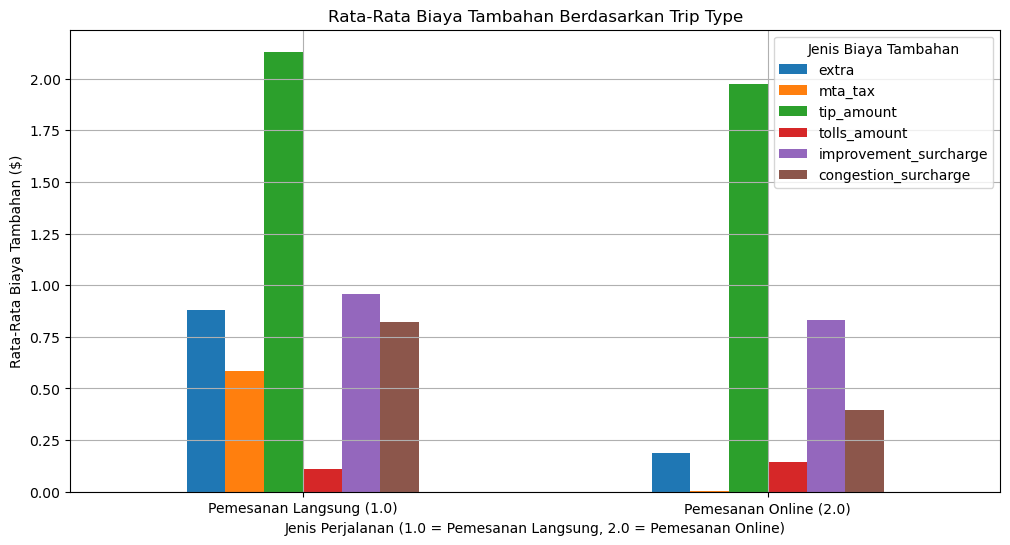

In [86]:
trip_type_counts = df['trip_type'].value_counts()

trip_type_charges = df.groupby('trip_type')[additional_charge].mean()

trip_type_charges.plot(kind='bar', figsize=(12, 6))
plt.title('Rata-Rata Biaya Tambahan Berdasarkan Trip Type')
plt.xlabel('Jenis Perjalanan (1.0 = Pemesanan Langsung, 2.0 = Pemesanan Online)')
plt.ylabel('Rata-Rata Biaya Tambahan ($)')
plt.xticks([0, 1], ['Pemesanan Langsung (1.0)', 'Pemesanan Online (2.0)'], rotation=0)
plt.legend(title='Jenis Biaya Tambahan')
plt.grid(True)
plt.show()

Grafik di atas menunjukkan perbandingan rata-rata biaya tambahan berdasarkan jenis perjalanan. Dari visualisasi, kita dapat melihat beberapa temuan yaitu:

Pemesanan Langsung di Jalan (1.0):

Perjalanan ini cenderung memiliki biaya tambahan yang lebih rendah, yang mungkin mencerminkan sifat spontan dan langsung dari pemesanan ini. Tarif ini sering kali standar tanpa biaya tambahan khusus yang signifikan.

Pemesanan Online (2.0):
Perjalanan ini, yang diatur melalui aplikasi atau pemesanan terjadwal, menunjukkan biaya extra dan congestion_surcharge yang lebih tinggi. Ini mungkin mencerminkan biaya pengelolaan atau layanan yang terkait dengan pemesanan terjadwal atau penggunaan teknologi dalam proses pemesanan.

Kesimpulannya operator taksi dan perencana kota dapat mengatur kebijakan dan tarif yang lebih efektif yang memperhitungkan cara pemesanan. Misalnya, pemesanan melalui aplikasi mungkin menuntut infrastruktur dan layanan tambahan yang dapat dibenarkan dengan biaya extra yang lebih tinggi

#### **Pengaruh RatecodeID terhadap Biaya Tambahan**

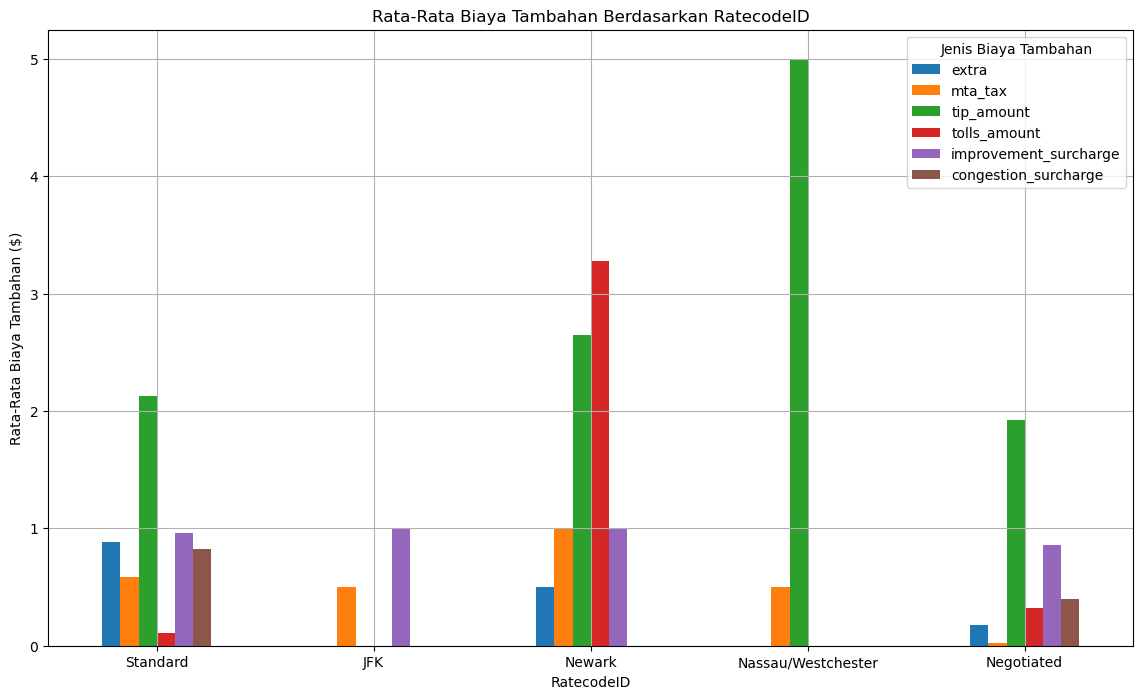

In [87]:
ratecode_charges = df.groupby('RatecodeID')[additional_charge].mean()

ratecode_charges.plot(kind='bar', figsize=(14, 8))
plt.title('Rata-Rata Biaya Tambahan Berdasarkan RatecodeID')
plt.xlabel('RatecodeID')
plt.ylabel('Rata-Rata Biaya Tambahan ($)')
plt.xticks(ticks=[0, 1, 2, 3, 4], labels=['Standard', 'JFK', 'Newark', 'Nassau/Westchester', 'Negotiated'], rotation=0)
plt.legend(title='Jenis Biaya Tambahan')
plt.grid(True)
plt.show()

Grafikdi atas menunjukkan rata-rata biaya tambahan berdasarkan RatecodeID, yang menggambarkan perbedaan biaya tambahan antar jenis tarif:

1. Tarif JFK dan Tarif Newark: Seperti yang diharapkan, tarif yang berkaitan dengan bandara (JFK dan Newark) menunjukkan biaya tambahan yang lebih tinggi, terutama untuk tolls_amount dan congestion_surcharge. Hal ini kemungkinan besar karena perjalanan ke bandara sering melewati jalan tol dan area kemacetan.
2. Tarif Nassau atau Westchester: Tarif ini juga menunjukkan biaya tambahan yang lebih tinggi, yang mungkin mencerminkan jarak yang lebih jauh dan penggunaan jalan tol.
3. Tarif yang Ditawar: Biaya tambahan untuk tarif ini beragam dan bisa mencakup kesepakatan khusus yang tidak mengikuti pola tarif standar.

#### **Pengaruh payment_type terhadap biaya tambahan**

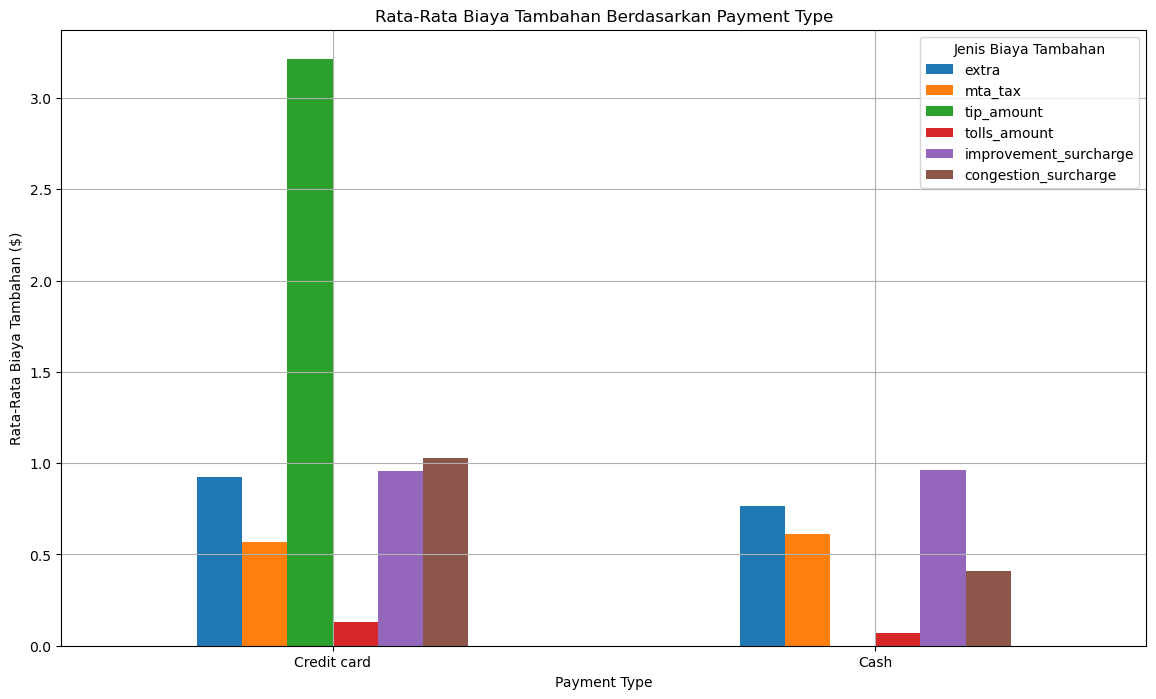

In [88]:
payment_type_charges = df.groupby('payment_type')[additional_charge].mean()
unique_payment_types = df['payment_type'].unique()
label = ['Credit card', 'Cash']

payment_type_charges.plot(kind='bar', figsize=(14, 8))
plt.title('Rata-Rata Biaya Tambahan Berdasarkan Payment Type')
plt.xlabel('Payment Type')
plt.ylabel('Rata-Rata Biaya Tambahan ($)')
plt.xticks(ticks=range(len(label)), labels=label, rotation=0)
plt.legend(title='Jenis Biaya Tambahan')
plt.grid(True)
plt.show()


Grafik di atas sekarang menampilkan rata-rata biaya tambahan berdasarkan payment_type dengan label yang tepat. Dari visualisasi, kita dapat melihat bagaimana biaya tambahan bervariasi berdasarkan metode pembayaran yang berbeda:

- Credit Card: Pembayaran dengan kartu kredit cenderung memiliki biaya tambahan yang lebih tinggi dibandingkan dengan metode pembayaran lainnya. Hal ini mungkin karena transaksi kartu kredit sering lebih terdokumentasi dan terorganisir, sehingga mempermudah penerapan biaya tambahan.

- Cash: Pembayaran tunai mungkin menunjukkan biaya tambahan yang lebih rendah atau kurang konsisten diterapkan, mungkin karena kurangnya dokumentasi atau kesulitan dalam menghitung biaya secara tepat saat pembayaran.

# Kesimpulan dan Rekomendasi 


### Kesimpulan

1. Biaya tambahan memainkan peran krusial dalam menentukan struktur tarif keseluruhan dan secara langsung mempengaruhi jumlah yang harus dibayar oleh pelanggan. Biaya-biaya ini seringkali merupakan refleksi dari biaya operasional langsung (seperti tol dan biaya kemacetan) serta nilai tambahan yang diberikan kepada pelanggan

2. Biaya tambahan yang berfluktuasi berdasarkan waktu menunjukkan responsivitas sistem tarif terhadap dinamika permintaan dan kondisi operasional. Jam sibuk dan akhir pekan, yang secara tradisional merupakan waktu puncak untuk layanan taksi, memerlukan penyesuaian tarif untuk mengelola permintaan yang tinggi dan kondisi lalu lintas yang padat

3. Lokasi penjemputan dan pengantaran memiliki dampak yang kuat terhadap biaya tambahan yang dikenakan, mengindikasikan bahwa faktor geografis dan kebijakan lokal sangat mempengaruhi struktur tarif taksi. Perbedaan ini menuntut pendekatan yang disesuaikan untuk penetapan tarif di berbagai wilayah untuk memastikan keadilan dan keberlanjutan operasional

4. Berdasarkan kolom tertentu:
    - Tarif khusus seperti JFK dan Newark memiliki biaya tambahan yang lebih tinggi, terutama tolls_amount dan congestion_surcharge, yang mencerminkan biaya tambahan akibat lokasi atau kebutuhan spesifik rute
    - Ada hubungan positif antara jarak perjalanan dan biaya seperti tolls_amount. Perjalanan yang lebih jauh cenderung menarik biaya tambahan yang lebih tinggi, terutama biaya tol
    - Pembayaran dengan kartu kredit sering kali memiliki biaya tambahan yang lebih tinggi dibandingkan dengan pembayaran tunai. Transaksi kartu kredit lebih mudah untuk dikenakan biaya tambahan karena kemudahan pelacakan dan pemrosesan


### Rekomendasi

1. Perusahaan taksi harus memastikan bahwa semua biaya tambahan dijelaskan dengan jelas kepada pelanggan sebelum perjalanan dimulai. Ini akan membantu dalam membangun kepercayaan dan menghindari kebingungan atau ketidakpuasan pelanggan terhadap biaya yang tampak tidak terduga.

2. Dianjurkan untuk terus menganalisis korelasi antara biaya tambahan dan total biaya untuk mengoptimalkan dan menyesuaikan struktur tarif, memastikan bahwa mereka mencerminkan biaya operasional yang realistis sambil tetap kompetitif dalam pasar.

3. Penting bagi perusahaan taksi untuk mengkomunikasikan bagaimana dan kapan biaya tambahan mungkin berlaku. Memberikan transparansi ini akan membantu pelanggan dalam membuat keputusan yang lebih informasi tentang kapan dan bagaimana mereka memilih untuk bepergian

4.  Melakukan evaluasi dan revisi reguler terhadap struktur tarif berdasarkan data terkini dan feedback pelanggan akan membantu perusahaan taksi tetap relevan dan kompetitif di pasar yang dinamis